# Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this case study, our goal is *to build a machine learning model that is able to predict churning customers based on the features provided for their usage.*

**Objectives**
1. The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

2. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

3. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

4. Recommend strategies to manage customer churn based on your observations.

**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</u> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

# Column Transformer and Pipeline Approach for Robust Data Preprocessing

***This notebook showcases a robust and production-ready approach to data preprocessing using the ColumnTransformer and Pipeline classes from scikit-learn. Unlike approaches that often involve directly modifying the test data, this approach focuses on defining a sequence of preprocessing and feature engineering steps that are then applied within a pipeline structure. This modularity and encapsulation offer several benefits, making the process more efficient and reliable.***

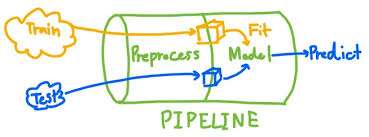

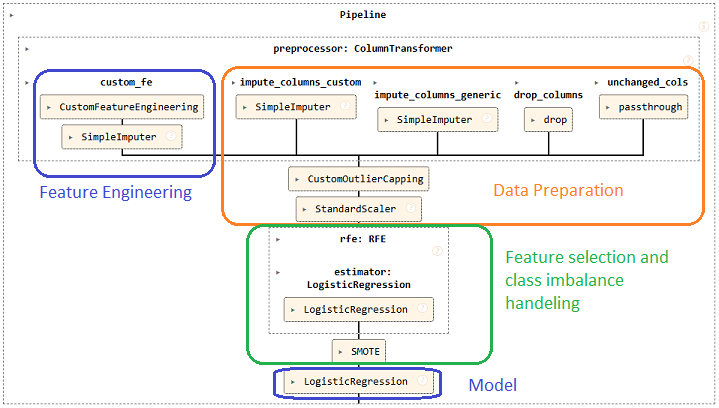


**Distinct Advantages of Pipeline Approach**

1. Data Integrity and Reproducibility

2. Modularity and Flexibility

3. Production Readiness



**Application in this Notebook**

In this notebook, the preprocessing and feature engineering steps are first clearly defined using separate functions or custom transformer classes. These steps are then encapsulated within a Pipeline using the ColumnTransformer. This pipeline handles various tasks, including:
- Custom Feature Engineering on Date Columns: Feature engineering is applied to specific date columns, calculating differences and creating new features, which are then imputed if required.
- Imputation: SimpleImputer handles missing values in both custom and generic imputation columns.
- Dropping Columns: Unnecessary columns are dropped using drop.
- Passthrough for Unchanged Columns: Unchanged columns are passed through as is using passthrough.

The resulting pipeline ensures that raw input data undergoes the same set of transformations before being fed into the models, making the process robust and consistent.

**Overall Approach**

This approach differs from the traditional approach of modifying test data directly by separating preprocessing steps from model training, allowing these steps to be captured within a reusable pipeline. This makes the code cleaner, more maintainable, and less prone to errors. It also ensures that the same transformations are applied consistently across different datasets.

With its modularity, flexibility, and production readiness, this approach is ideal for building reliable and deployable machine learning models, making it particularly well-suited for cloud environments like Azure or AWS. It allows for effortless transition from experimentation to production, ensuring the consistent and predictable performance of models over time.

# Housekeeping

In [ ]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

#import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV #HalvingGridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

from sklearn.compose import ColumnTransformer, make_column_selector


# imblearn make pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import SMOTE

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load data and have first look

In [ ]:
'''
!pip install kaggle

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c telecom-churn-case-study-hackathon-c-67

!unzip telecom-churn-case-study-hackathon-c-67.zip
'''

'\n!pip install kaggle\n\n!mkdir ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!kaggle competitions download -c telecom-churn-case-study-hackathon-c-67\n\n!unzip telecom-churn-case-study-hackathon-c-67.zip\n'

In [ ]:
data = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")
data_dict = data_dict.to_dict(orient='index')

print(data.shape)
print(unseen.shape)
print(sample.shape)

(69999, 172)
(30000, 171)
(30000, 2)


In [ ]:
data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [ ]:
data.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

# Randomly sample x% of the data

This is not being used. Code is commented out.

In [ ]:
'''
# Randomly sample x% of the data
data = data.sample(frac=0.2, random_state=42)  # random_state for reproducibility

data.shape
'''

'\n# Randomly sample x% of the data\ndata = data.sample(frac=0.2, random_state=42)  # random_state for reproducibility\n\ndata.shape\n'

# Filter high value customers

This is not being used. Code is commented out.

In [ ]:
'''
recharge_data = data['total_rech_amt_6'] + data['total_rech_amt_7'] + data['total_rech_amt_8']

high_mark = recharge_data.quantile(0.7)

data = data[recharge_data > high_mark]

data.shape
'''

"\nrecharge_data = data['total_rech_amt_6'] + data['total_rech_amt_7'] + data['total_rech_amt_8']\n\nhigh_mark = recharge_data.quantile(0.7)\n\ndata = data[recharge_data > high_mark]\n\ndata.shape\n"

# Test Train Split

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X.shape, y.shape

((69999, 171), (69999,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape,  y_test.shape

((55999, 171), (55999,), (14000, 171), (14000,))

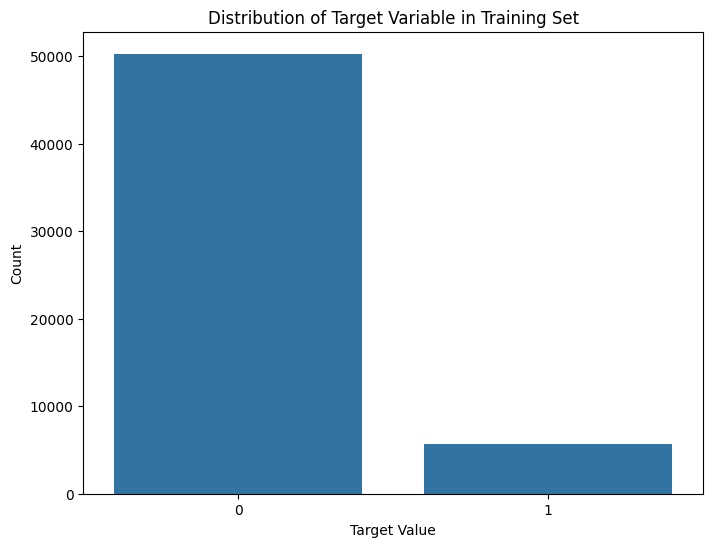

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each target value
target_counts = y_train.value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target Variable in Training Set")
plt.show()

***Severe class imbalance is present in the dataset. We will be addressing this later.***

# Data Understanding, Preparation, and Pre-Processing

- Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
- Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format

This section focuses on preparing the data for modeling without modifying the original data directly. This is achieved by creating a series of steps that define how data should be processed in a pipeline structure.

**Steps performed:**
Data Understanding and Column Categorization:
  - The analyze_dataframe function is defined to analyze the dataset and understand column characteristics (data types, missing values, unique values).
  - Columns are categorized into different lists based on the analysis: col_drop, col_dates, col_custom_impute, col_gen_impute, col_unchanged. **This categorization helps in applying specific transformations to relevant columns later.**

## Define analyze_dataframe

In [ ]:
def analyze_dataframe(df):
    """Analyzes a Pandas DataFrame and returns a summary DataFrame.

    This function iterates through each column of the input DataFrame and
    calculates the following statistics:

    - Number of unique values
    - First 10 unique values
    - Percentage of NaN values
    - Expanded column name (using a data dictionary)

    The function then prints the number of columns with NaN values and
    returns a summary DataFrame containing the calculated statistics.

    Args:
        df (pd.DataFrame): The input Pandas DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with columns:
            - 'Column Name': The original column name.
            - 'Number of Unique Values': The number of unique values in the column.
            - 'First 10 Unique Values': A string containing the first 10 unique values.
            - '% of NaN': The percentage of NaN values in the column.
            - 'Expanded Column Name': The expanded column name using the data dictionary.
    """

    def expand_variable_name(col_name):
        """Expands a column name using a data dictionary."""
        result_dict = {}
        for key, value in data_dict.items():
            result_dict[value['Acronyms'].strip().lower()] = value['Description']

        parts = col_name.split("_")
        expanded_name = ""
        for i, part in enumerate(parts[:-1]):
            if part in result_dict:
                expanded_name += result_dict[part]
                if i < len(parts) - 2:  # Add underscore if not the last part
                    expanded_name += "_"
            else:
                expanded_name += part + "_"
        expanded_name += parts[-1] # Append month
        return expanded_name

    summary = []
    for col in df.columns:
        unique_vals = df[col].unique()
        num_unique = len(unique_vals)
        first_10_unique = ", ".join(map(str, unique_vals[:10]))  # Handle non-string types
        nan_percentage = df[col].isna().sum() / len(df) * 100
        summary.append([col, num_unique, first_10_unique, nan_percentage])

    summary_df = pd.DataFrame(summary, columns=["Column Name", "Number of Unique Values", "First 10 Unique Values", "% of NaN"])

    summary_df['Expanded Column Name'] = summary_df['Column Name'].apply(expand_variable_name)

    print("Number of columns with NaN values: ", len(summary_df[summary_df["% of NaN"]>0]))

    return summary_df

## Analyze Dataframe

In [ ]:
summary_data = analyze_dataframe(X_train)
summary_data

Number of columns with NaN values:  125


Column Name  Number of Unique Values  \
0                id                    55999   
1         circle_id                        1   
2    loc_og_t2o_mou                        2   
3    std_og_t2o_mou                        2   
4    loc_ic_t2o_mou                        2   
..              ...                      ...   
166       fb_user_8                        3   
167             aon                     3420   
168      aug_vbc_3g                     8662   
169      jul_vbc_3g                     8335   
170      jun_vbc_3g                     7845   

                                First 10 Unique Values   % of NaN  \
0    47338, 67455, 12308, 52334, 664, 21003, 29637,...   0.000000   
1                                                  109   0.000000   
2                                             0.0, nan   1.030376   
3                                             0.0, nan   1.030376   
4                                             0.0, nan   1.030376   
..                                                 ...        ...   
166                                      nan, 1.0, 0.0  73.712031   
167  395, 515, 595, 656, 499, 408, 2489, 1330, 1578...   0.000000   
168  0.0, 957.21, 174.0, 23.63, 9.93, 283.06, 48.07...   0.000000   
169  0.0, 30.97, 88.32, 62.81, 90.22, 1275.96, 127....   0.000000   
170  0.0, 254.96, 42.34, 1440.04, 1714.74, 27.02, 4...   0.000000   

                                  Expanded Column Name  
0                                                   id  
1                                            circle_id  
2    Local calls  within same telecom circle_Outgoi...  
3    STD calls  outside the calling circle_Outgoing...  
4    Local calls  within same telecom circle_Incomi...  
..                                                 ...  
166                                          fb_user_8  
167                                                aon  
168  aug_Volume based cost  when no specific scheme...  
169  jul_Volume based cost  when no specific scheme...  
170  jun_Volume based cost  when no specific scheme...  

[171 rows x 5 columns]

## Prepare columns for processing

In [ ]:
# prepare vars

col_all = summary_data["Column Name"].tolist()
col_drop = []
col_dates = []
col_custom_impute = []
col_gen_impute = []
col_unchanged = []
col_dates = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
              'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
             'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8' ]

### Drop Columns

In [ ]:
# Drop id column
col_drop += ['id']
print(len(col_drop))
print(col_drop)

1
['id']


In [ ]:
# Drop columns with more than 50% missing values
col_drop += summary_data[(summary_data["% of NaN"]>50) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates)==False)
                         ]["Column Name"].tolist()
print(len(col_drop))
print(col_drop)

28
['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [ ]:
# Drop columns that have only one unique value
col_drop += summary_data[(summary_data["Number of Unique Values"]==1) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates)==False)
                        ]["Column Name"].tolist()
print(len(col_drop))
print(col_drop)

29
['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'circle_id']


In [ ]:
# Drop columns that have only 2 unique values and the values are 0.0 and nan
col_drop += summary_data[(summary_data["Number of Unique Values"]==2) &
                         (summary_data["First 10 Unique Values"]=='0.0, nan') &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates)==False)
                         ]["Column Name"].tolist()
print(len(col_drop))
print(col_drop)

38
['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


### Custom Impute Columns

In [ ]:
# check if mou total fields are always zero when mou fields are NaN

# Iterate through different mou types (mou_6, mou_7, mou_8)
for type in ['mou_6', 'mou_7', 'mou_8']:

    # Filter columns related to the current mou type using regex
    X_train_mou = X_train.filter(regex=type+'$')

    # Identify rows with null values in any of the mou columns
    mou_cols_with_null = X_train_mou.isnull().any(axis=1)

    # Select rows with null values
    rows_with_nan = X_train_mou[mou_cols_with_null]

    print(type, (rows_with_nan['total_og_'+type] != 0).sum())
    print(type, (rows_with_nan['total_ic_'+type] != 0).sum())

# Select columns related to 'mou', exclude columns in col_drop and col_dates
col_custom_impute = summary_data[(summary_data["Column Name"].isin(X_train.filter(regex='mou').columns.tolist())) &
                                  (summary_data["Column Name"].isin(col_drop +
                                                                    col_dates)==False)
                                  ]["Column Name"].tolist()

print(len(col_custom_impute))
print(col_custom_impute)

mou_6 0
mou_6 0
mou_7 0
mou_7 0
mou_8 0
mou_8 0
81
['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic

### Generic Impute Columns

In [ ]:
# Columns to be imputed generically
col_gen_impute = summary_data[(summary_data["% of NaN"]> 0) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates +
                                                           col_custom_impute)==False)
                         ]["Column Name"].tolist()
print(len(col_gen_impute))
print(col_gen_impute)

6
['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6', 'ic_others_7', 'ic_others_8']


In [ ]:
# Columns to be left unchanged
col_unchanged = summary_data[(summary_data["% of NaN"]== 0) &
                         (summary_data["Column Name"].isin(col_drop +
                                                           col_dates +
                                                           col_custom_impute +
                                                           col_gen_impute)==False)
                         ]["Column Name"].tolist()
print(len(col_unchanged))
print(col_unchanged)

37
['arpu_6', 'arpu_7', 'arpu_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']


### Verify Date Columns

In [ ]:
# contents of col_dates that are in col_drop
[x for x in col_dates if x in col_drop]

[]

### Verify is duplicate Columns are selected

In [ ]:
# Verify if there are any NaN columns now
analyze_dataframe(X_train[X_train.columns[X_train.columns.isin(col_drop +
                                                                col_dates +
                                                                col_custom_impute +
                                                                col_gen_impute)==False].tolist()])

Number of columns with NaN values:  0


Column Name  Number of Unique Values  \
0               arpu_6                    49977   
1               arpu_7                    49857   
2               arpu_8                    48837   
3     total_rech_num_6                       92   
4     total_rech_num_7                       94   
5     total_rech_num_8                       89   
6     total_rech_amt_6                     2004   
7     total_rech_amt_7                     2031   
8     total_rech_amt_8                     2034   
9       max_rech_amt_6                      186   
10      max_rech_amt_7                      175   
11      max_rech_amt_8                      197   
12  last_day_rch_amt_6                      174   
13  last_day_rch_amt_7                      160   
14  last_day_rch_amt_8                      186   
15         vol_2g_mb_6                     9584   
16         vol_2g_mb_7                     9574   
17         vol_2g_mb_8                     9497   
18         vol_3g_mb_6                     7927   
19         vol_3g_mb_7                     8303   
20         vol_3g_mb_8                     8604   
21        monthly_2g_6                        5   
22        monthly_2g_7                        6   
23        monthly_2g_8                        6   
24         sachet_2g_6                       30   
25         sachet_2g_7                       33   
26         sachet_2g_8                       32   
27        monthly_3g_6                        9   
28        monthly_3g_7                       12   
29        monthly_3g_8                       11   
30         sachet_3g_6                       23   
31         sachet_3g_7                       25   
32         sachet_3g_8                       27   
33                 aon                     3420   
34          aug_vbc_3g                     8662   
35          jul_vbc_3g                     8335   
36          jun_vbc_3g                     7845   

                               First 10 Unique Values  % of NaN  \
0   172.25, 155.61, 68.285, 139.165, 475.536, 298....       0.0   
1   149.72, 53.934, 71.308, 205.666, 137.251, 401....       0.0   
2   244.222, 47.532, 35.515, 172.807, 0.0, 385.958...       0.0   
3                      6, 12, 5, 7, 9, 13, 2, 3, 1, 4       0.0   
4                    4, 5, 10, 3, 17, 2, 6, 8, 27, 40       0.0   
5                   2, 3, 5, 1, 19, 6, 24, 49, 14, 18       0.0   
6       0, 174, 80, 226, 660, 336, 200, 110, 250, 417       0.0   
7        0, 57, 80, 236, 110, 466, 200, 366, 277, 130       0.0   
8        398, 70, 40, 136, 0, 478, 426, 384, 256, 250       0.0   
9           0, 30, 110, 50, 200, 250, 179, 36, 71, 65       0.0   
10        0, 30, 50, 110, 200, 150, 130, 250, 350, 36       0.0   
11        398, 30, 50, 0, 200, 128, 100, 250, 36, 130       0.0   
12            0, 10, 30, 110, 20, 154, 50, 25, 26, 31       0.0   
13          0, 7, 50, 110, 36, 150, 130, 250, 128, 20       0.0   
14         398, 30, 10, 36, 0, 50, 200, 110, 250, 100       0.0   
15  0.0, 13.8, 0.09, 1131.41, 113.88, 140.03, 79.9...       0.0   
16  0.0, 17.83, 359.56, 4.71, 21.27, 202.01, 76.73...       0.0   
17  0.0, 141.41, 90.7, 3.65, 0.6, 272.02, 130.45, ...       0.0   
18  0.0, 908.16, 1305.98, 1111.93, 1938.02, 1016.1...       0.0   
19  0.0, 1014.22, 85.41, 369.41, 1988.9, 135.94, 7...       0.0   
20  0.0, 803.38, 214.61, 232.22, 838.81, 1399.65, ...       0.0   
21                                      0, 1, 2, 3, 4       0.0   
22                                   0, 1, 2, 3, 4, 5       0.0   
23                                   0, 1, 2, 3, 4, 5       0.0   
24                     0, 5, 19, 4, 1, 2, 3, 7, 9, 11       0.0   
25                      0, 2, 35, 3, 1, 4, 7, 8, 6, 5       0.0   
26                     0, 1, 4, 3, 2, 7, 5, 18, 6, 16       0.0   
27                          0, 1, 2, 3, 4, 5, 9, 7, 6       0.0   
28                      0, 1, 2, 3, 16, 5, 6, 4, 7, 8       0.0   
29                       0, 2, 1, 3, 4, 6, 5, 7, 8, 9       0.

### Check column overlap

In [ ]:
def check_column_overlap(col_all, col_dates, col_drop, col_custom_impute, col_gen_impute, col_unchanged):
    """
    Checks if any column name in col_all is present in more than one of the given lists.

    Returns:
        A list of column names that appear in more than one list, or an empty list if no overlaps are found.
    """

    overlapping_columns = []
    all_lists = [col_dates, col_drop, col_custom_impute, col_gen_impute, col_unchanged]
    list_names = ["col_dates", "col_drop", "col_custom_impute", "col_gen_impute", "col_unchanged"]

    for col in col_all:
        count = 0
        locations = []
        for i, col_list in enumerate(all_lists):
            if col in col_list:
                count += 1
                locations.append(list_names[i])
        if count > 1:
            overlapping_columns.append((col, locations))

    return overlapping_columns

overlapping_cols = check_column_overlap(col_all, col_dates, col_drop, col_custom_impute, col_gen_impute, col_unchanged)

if overlapping_cols:
    print("Overlapping columns found:")
    for col, locations in overlapping_cols:
        print(f"Column '{col}' is present in: {', '.join(locations)}")
else:
    print("No overlapping columns found.")

No overlapping columns found.


### Verify Columns varaiables prepared

In [ ]:
print('Total number of columns: ', len(col_all))

print('\nDate columns: ', len(col_dates), 'columns:', col_dates)

print('\nDrop ', len(col_drop), 'columns:', col_drop)

print('\nImpute columns Custom: ', len(col_custom_impute), 'columns:', col_custom_impute)

print('\nImpute columns generically: ', len(col_gen_impute), 'columns:', col_gen_impute)

print('\nUnchanged columns: ', len(col_unchanged), 'columns:', col_unchanged)

print('\n!!Sum and Balance: ', len(col_dates + col_drop + col_custom_impute + col_gen_impute + col_unchanged))

Total number of columns:  171

Date columns:  9 columns: ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

Drop  38 columns: ['id', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

Impute columns Custom:  81

# Exploratory Data Analysis

- Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
- Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data

In [ ]:
final_df = pd.concat([X_train, y_train], join='inner', axis=1)

## Univariate Analysis

### All selected columns

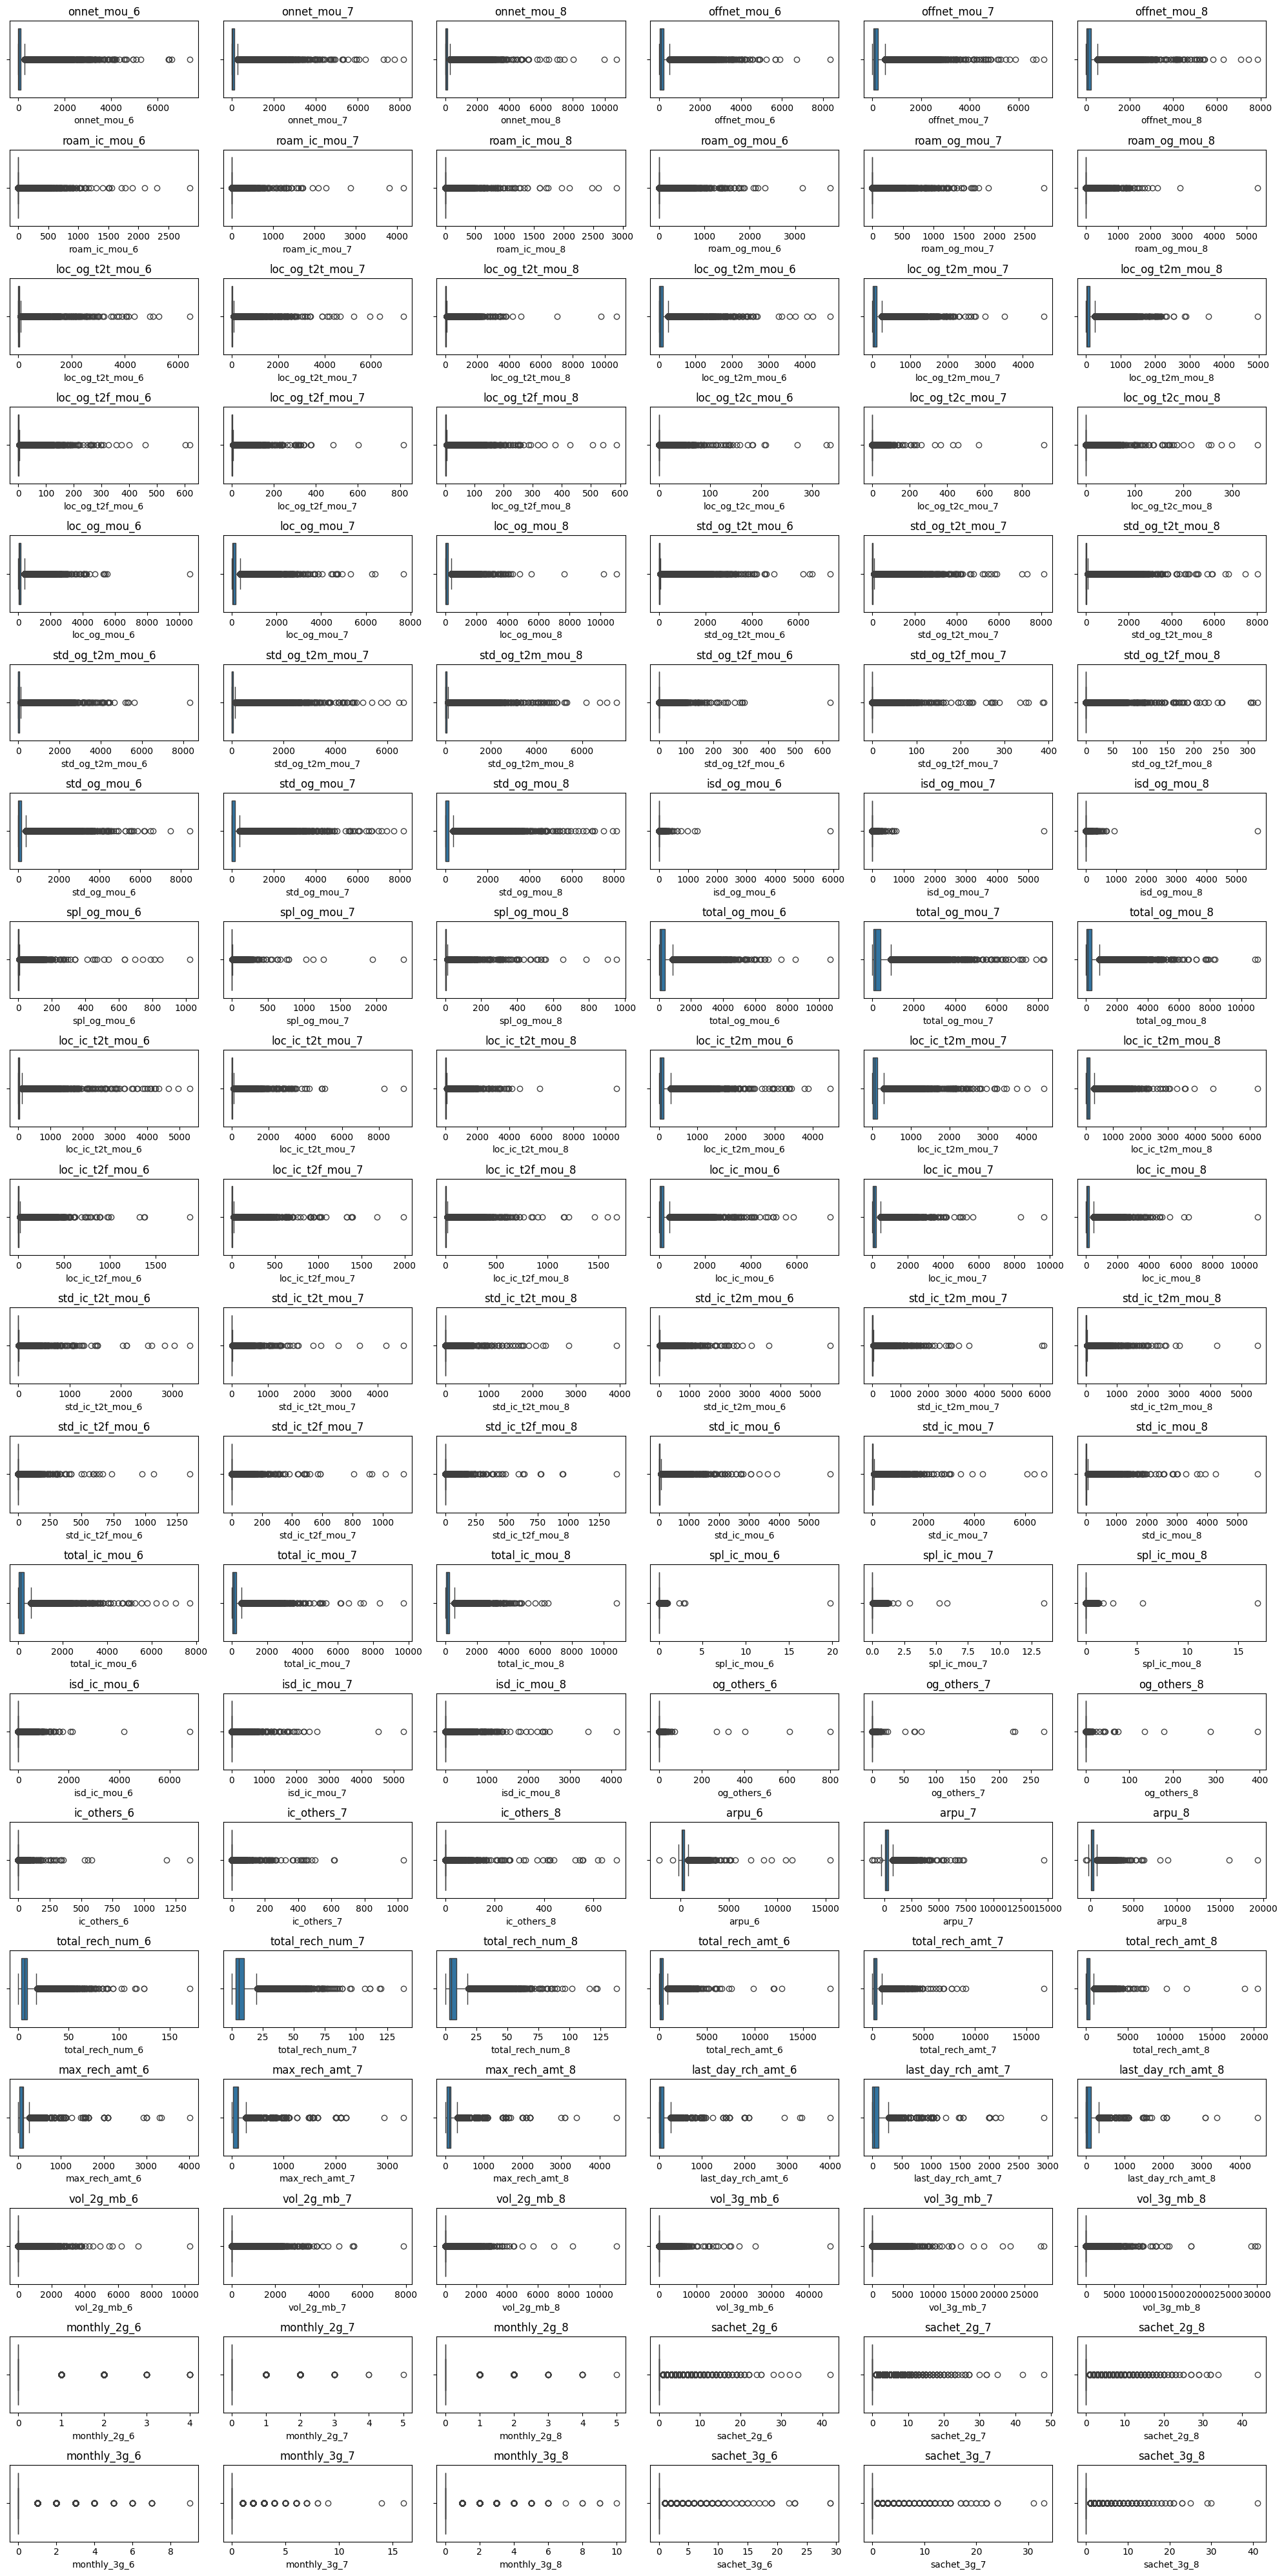

In [ ]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=20, ncols=6, figsize=(20, 40))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through each column and create a violin plot
for i, col in enumerate(col_custom_impute + col_gen_impute + col_unchanged):
    if i < len(axes):  # Check if we have enough subplots
      sns.boxplot(x=final_df[col], ax=axes[i])
      axes[i].set_title(col)

# Remove any unused subplots
for i in range(len(col_custom_impute + col_gen_impute + col_unchanged), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlapping titles and labels
plt.show()

### Outlier

<Axes: >

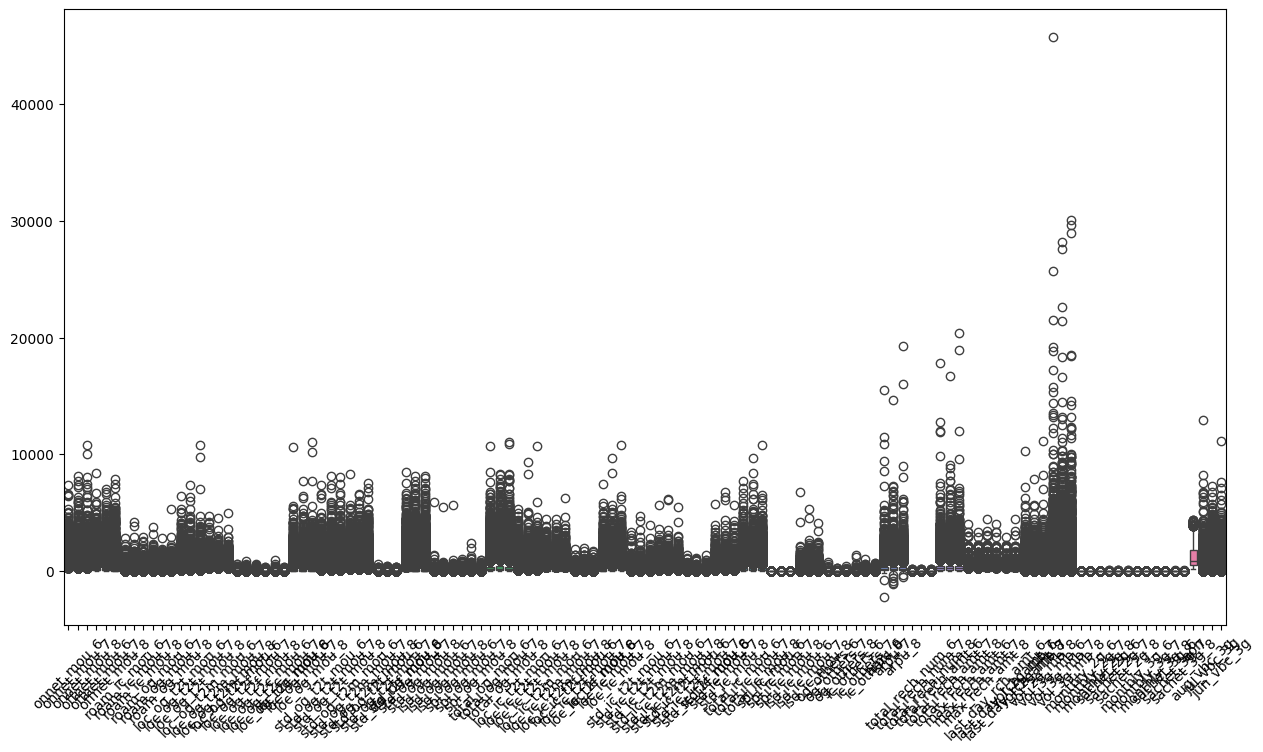

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train[col_custom_impute + col_gen_impute + col_unchanged])

**Key Observations:**

1. Extreme Outliers:

  - Many features have extreme outliers, as evident from the data points far above the main clusters.
  - These outliers may skew statistical calculations and negatively impact model performance.

2. Wide Range of Values:

  - Some features (on the left-hand side) have significantly larger ranges compared to others, indicating potential scaling issues.

**Techniques to Address Issues:**

1. Outlier Handling:
  - Winsorization: Cap extreme values to a specified percentile range (e.g., 1st and 99th percentiles).
  - IQR Method: Remove or adjust data points that lie beyond 1.5 times the interquartile range.
  - Domain-Specific Rules: If domain knowledge is available, define thresholds for valid data ranges.

2. Scaling and Normalization:
  - Apply standard scaling (z-score normalization) or min-max scaling to bring all features to a similar range.
  - Log transformation can be helpful for features with large ranges and positive skewness.

***We will perform outlier handeling using IQR methord. The below sklearn custom Transformer is created for the same and will be used in the pipelines.***

In [ ]:
# Custom transformer to cap outliers
class CustomOutlierCapping(BaseEstimator, TransformerMixin):
    """
    Custom transformer to cap outliers using the IQR method.

    This transformer identifies and caps outliers in the input data using the
    Interquartile Range (IQR) method. Outliers are values that fall outside
    a specified range defined by the IQR and a factor.

    Parameters
    ----------
    method : str, default='iqr'
        The method used for outlier capping. Currently, only 'iqr' is supported.
    factor : float, default=1.5
        The factor used to determine the outlier range. Outliers are defined
        as values outside the range [Q1 - factor * IQR, Q3 + factor * IQR],
        where Q1 and Q3 are the first and third quartiles, respectively.

    Attributes
    ----------
    lower_bound : pd.Series
        The lower bound for each feature, calculated during fitting.
    upper_bound : pd.Series
        The upper bound for each feature, calculated during fitting.
    """

    def __init__(self, method='iqr', factor=1.5):
        self.method = method
        self.factor = factor

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        if self.method == 'iqr':
            Q1 = X.quantile(0.25)
            Q3 = X.quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bound = Q1 - self.factor * IQR
            self.upper_bound = Q3 + self.factor * IQR
        return self

    def transform(self, X):
        X = pd.DataFrame(X)  # Ensure it's a DataFrame
        # Clip outliers
        for col in X.columns:
            X[col] = np.clip(X[col], self.lower_bound[col], self.upper_bound[col])
        return X

<Axes: >

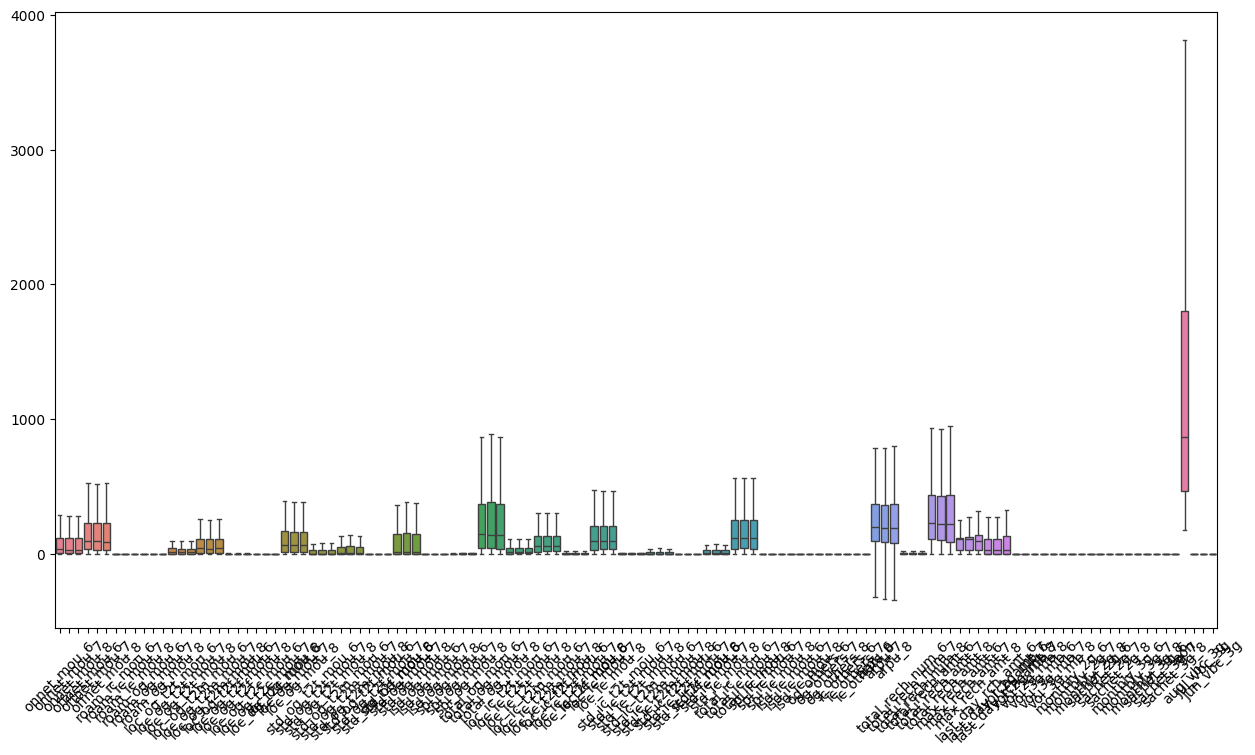

In [ ]:
# Create an instance of the custom transformer
outlier_capper = CustomOutlierCapping()

# Fit and transform the training data
X_train_capped = outlier_capper.fit_transform(X_train[col_custom_impute + col_gen_impute + col_unchanged])

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X_train_capped)

## Bivariate Analysis

### All selected columns

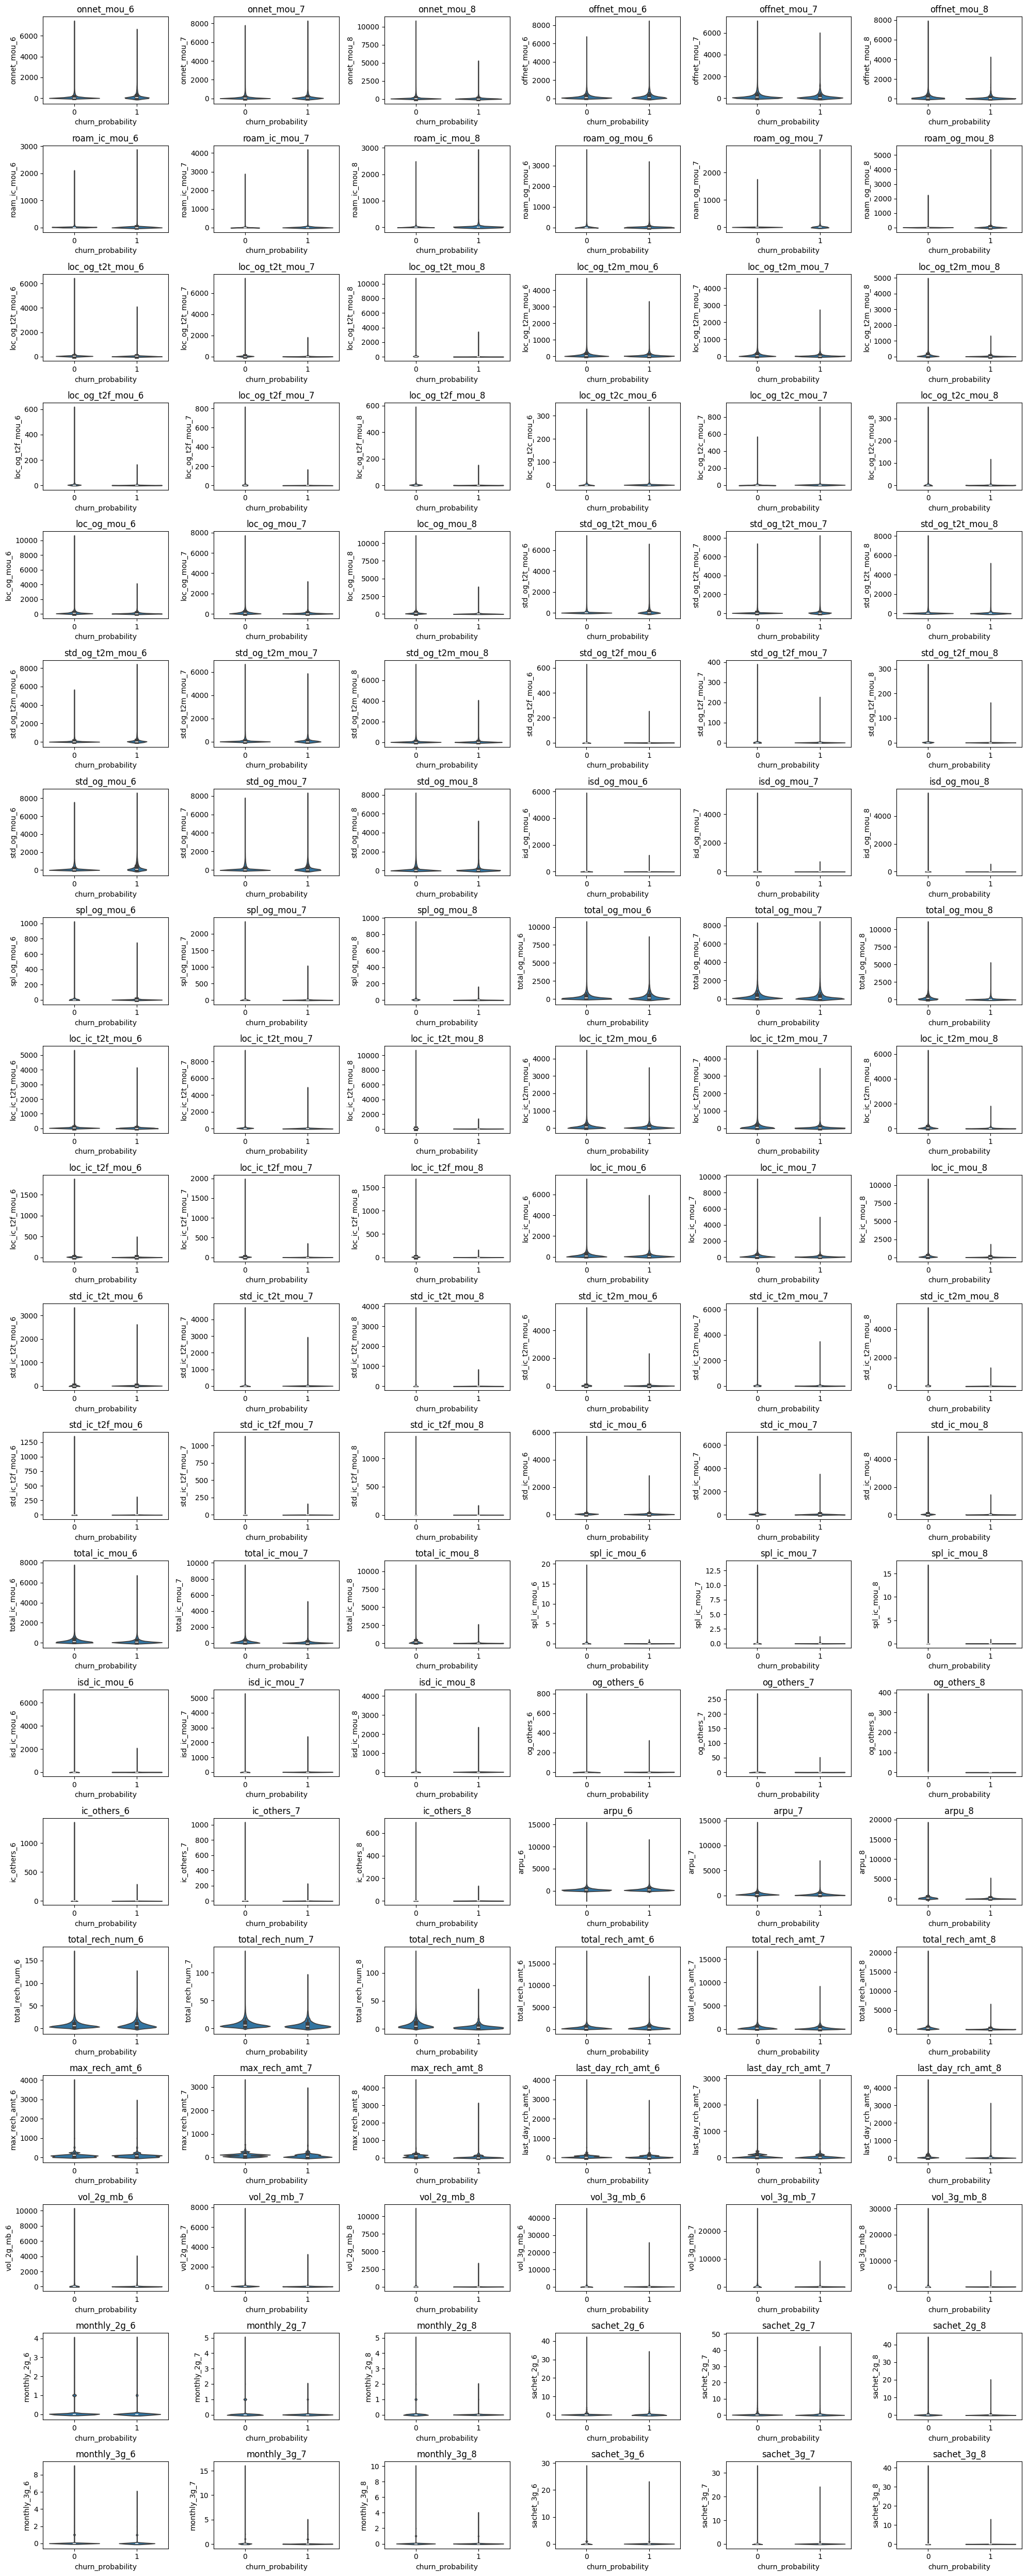

In [ ]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=20, ncols=6, figsize=(20, 50))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through each column and create a violin plot
for i, col in enumerate(col_custom_impute + col_gen_impute + col_unchanged):
    if i < len(axes):  # Check if we have enough subplots
        sns.violinplot(x='churn_probability', y=col, data=final_df[col_custom_impute + col_gen_impute + col_unchanged + ['churn_probability']], ax=axes[i])
        axes[i].set_title(col)

# Remove any unused subplots
for i in range(len(col_custom_impute + col_gen_impute + col_unchanged), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust layout to prevent overlapping titles and labels
plt.show()

### Behaviour Analysis

**Analyzing Customer Behavior Across Three Months to Identify Changes and Patterns**


**Objective:** The objective of this analysis is to understand how customer behavior evolves over three months (months 6, 7, and 8) and identify key changes, patterns, and potential indicators of churn. By examining specific variables related to customer activity, we aim to gain insights that can inform targeted retention strategies and improve overall business performance.

**Methodology:**

  - Data Selection: We will utilize the dataset containing customer-level information for months 6, 7, and 8, focusing on key variables that reflect customer engagement and spending patterns.

  - Variable Analysis: The "Behavior Analysis" section provides a detailed view of important variables using box plots. These variables include:

    - total_rech_amt: Total recharge amount
    - total_rech_num: Total recharge number
    - av_rech_amt_data: Average recharge amount for data
    - total_og_mou: Total outgoing minutes of usage
    - total_ic_mou: Total incoming minutes of usage

  - Trend Identification: We will analyze trends in these variables over the three-month period to identify shifts in customer behavior. For instance, a consistent decline in recharge amount or usage minutes could signal a potential churn risk.

  - Pattern Recognition: By examining the distribution of these variables for churned and non-churned customers, we can identify patterns associated with churn. For example, customers who churn might exhibit lower recharge amounts or reduced usage in the months leading up to churn.

In [ ]:
# create box plot function for  6th, 7th and 8th month variables
def plot_box_chart(data, attribute):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=data, y=attribute+"_6",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=data, y=attribute+"_7",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=data, y=attribute+"_8",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.show()

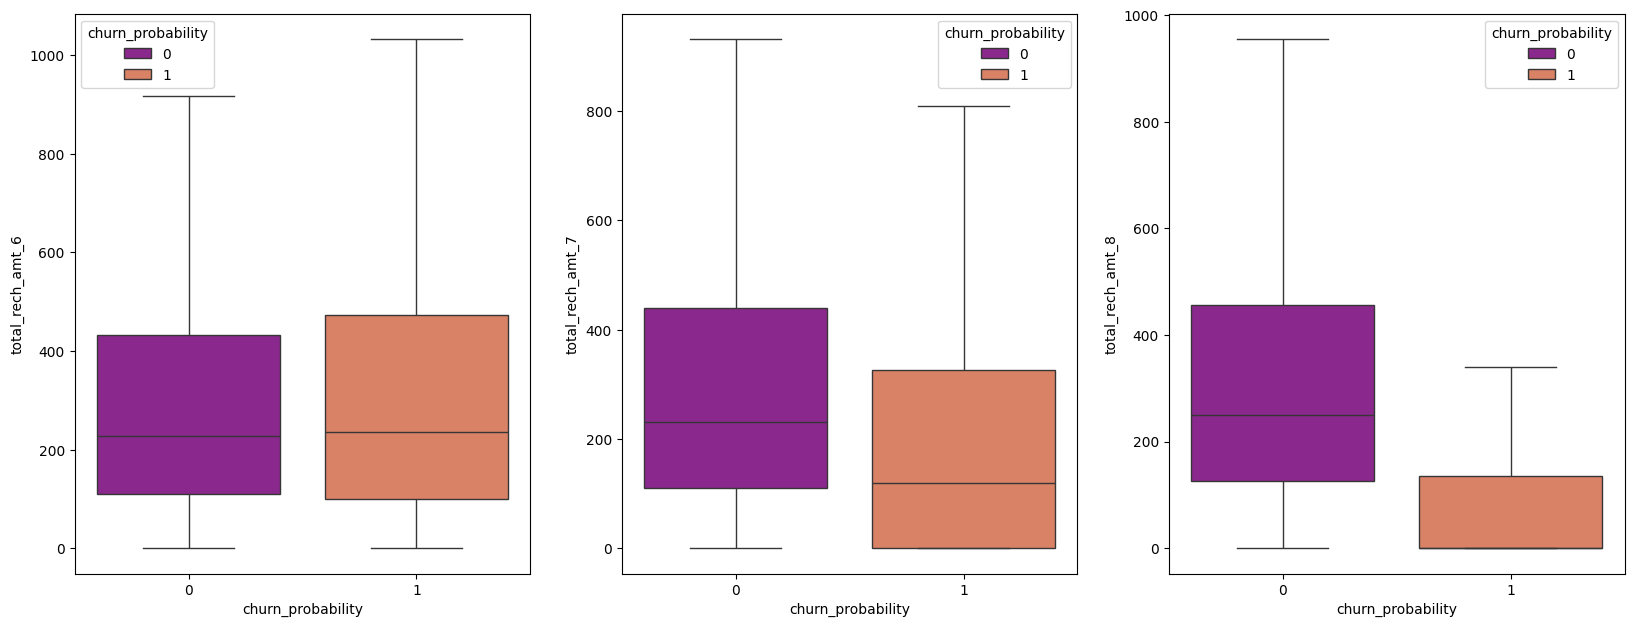

In [ ]:
plot_box_chart(data, "total_rech_amt")

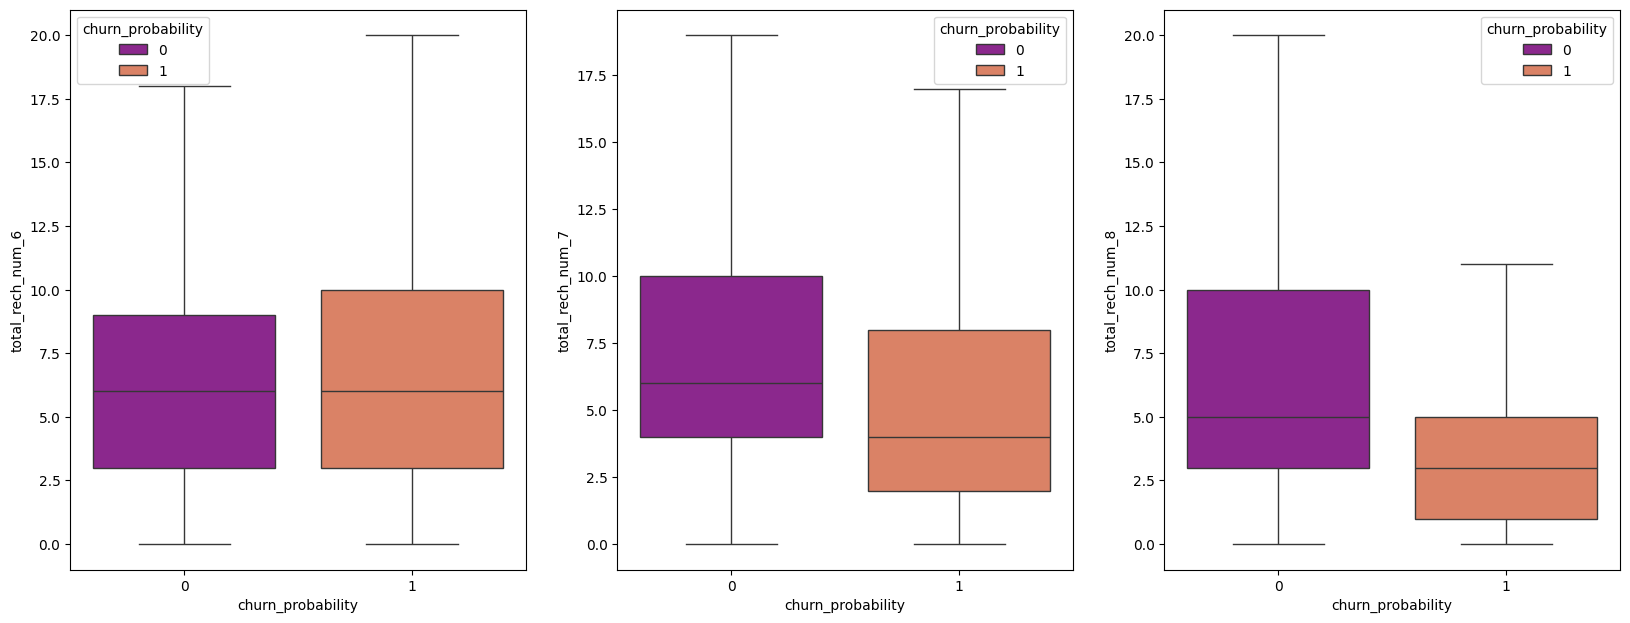

In [ ]:
plot_box_chart(data, "total_rech_num")

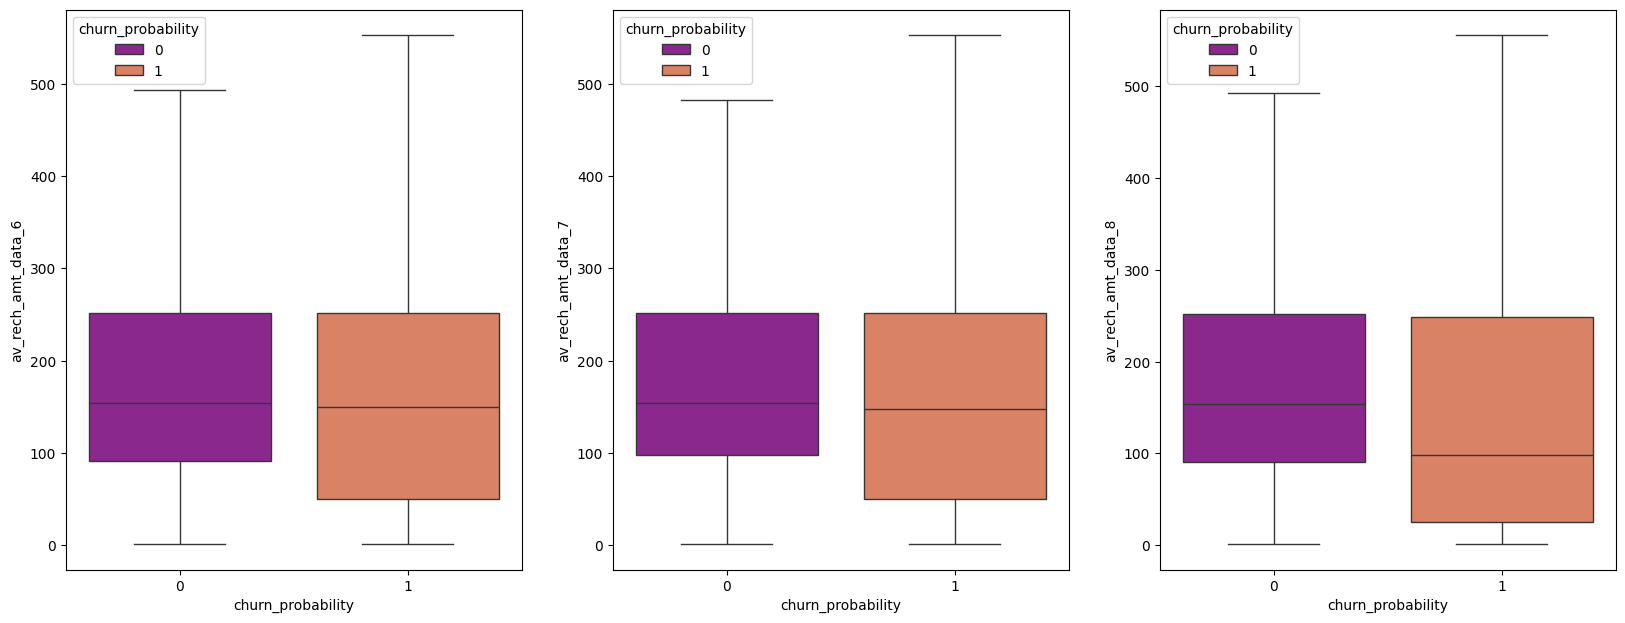

In [ ]:
plot_box_chart(data, "av_rech_amt_data")

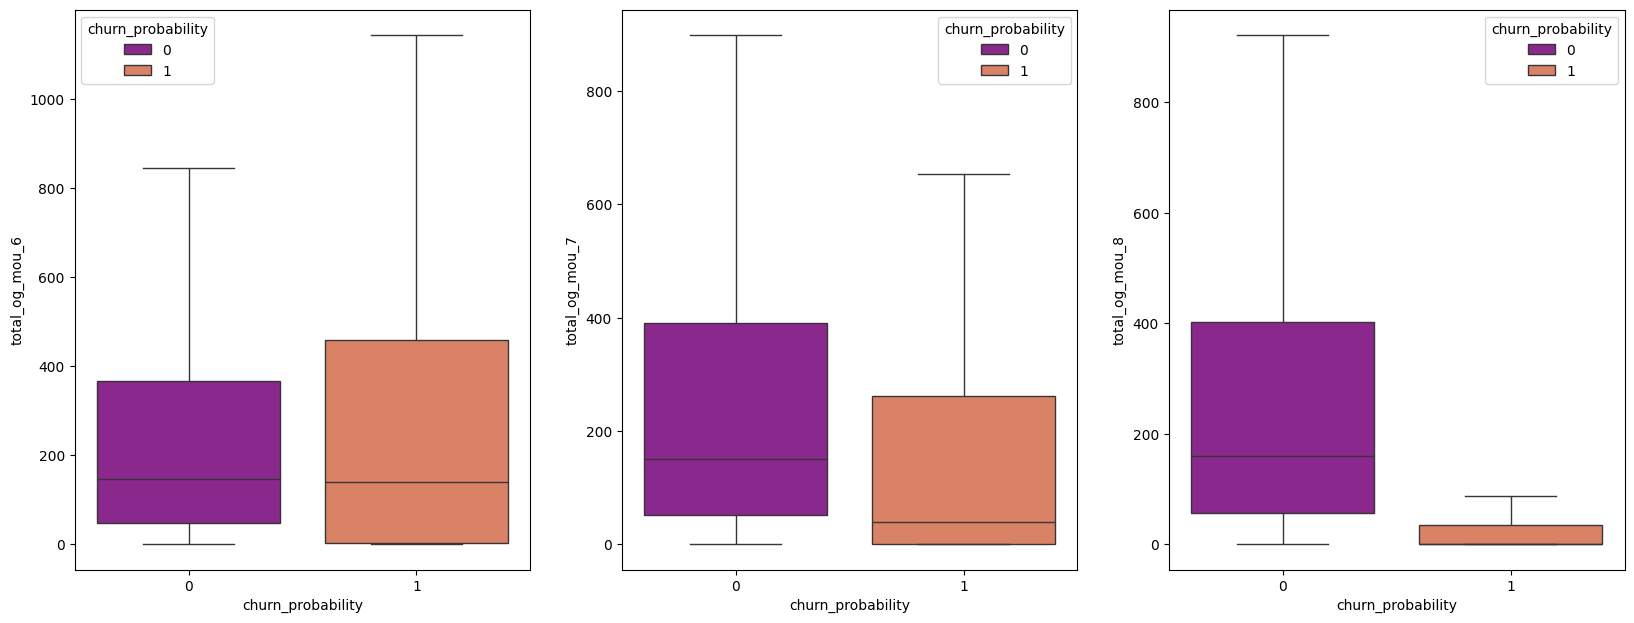

In [ ]:
plot_box_chart(data, "total_og_mou")

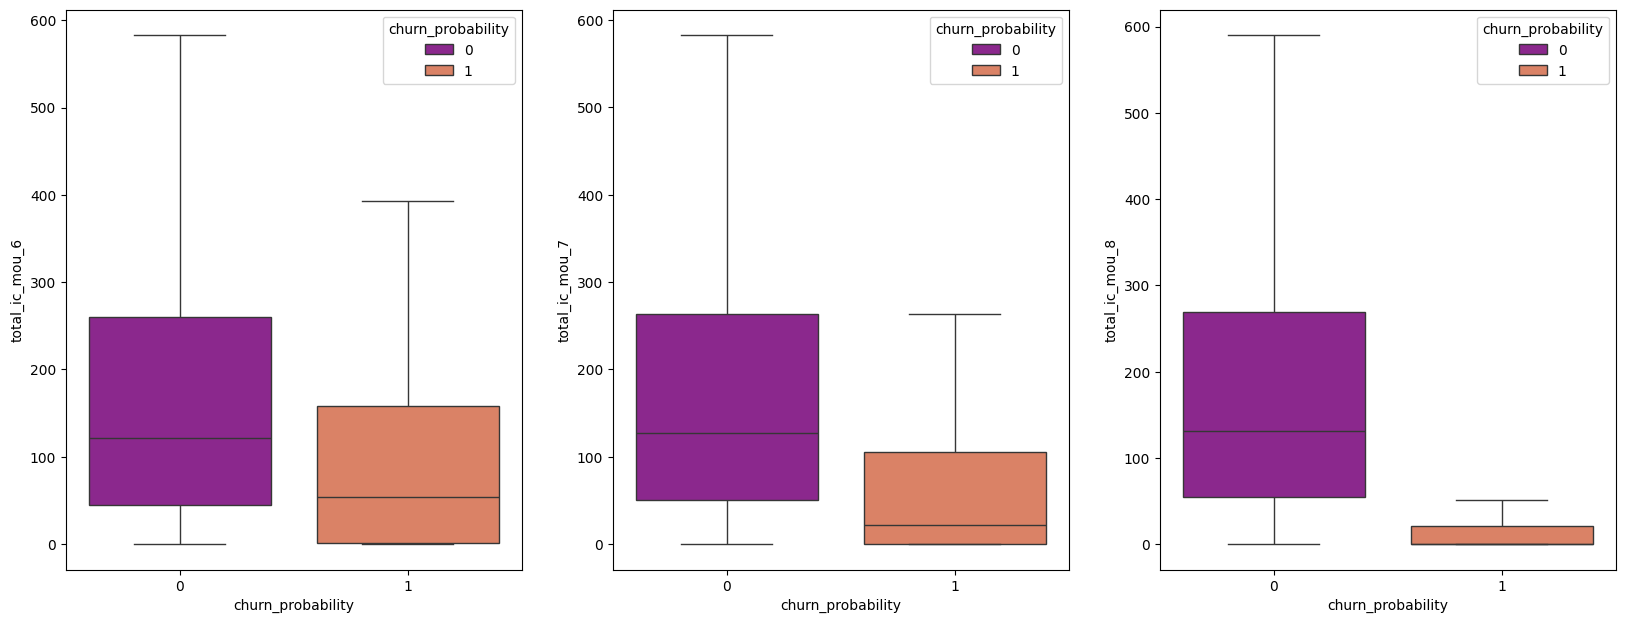

In [ ]:
plot_box_chart(data, "total_ic_mou")

**Insights from Box Plots: Customer Behavior and Churn Prediction**

**Key Observation:**

The box plots reveal distinct patterns in customer behavior for churned and non-churned customers across months 6, 7, and 8. While non-churn customers (class 0) maintain a relatively stable average recharge amount and usage, churned customers (class 1) exhibit a noticeable dip or reduction in usage variables, particularly in month 8. This trend is indicative of a potential early warning sign for churn.

**Specific Observations and Insights:**

- Average Recharge Amount (av_rech_amt_data): For non-churn customers, the median (50th percentile), 25th percentile, and 75th percentile for average recharge amount remain relatively stable across months 6, 7, and 8. However, for churned customers, there's a noticeable decline in the median and 25th percentile in month 8, suggesting reduced spending on data recharges as they approach churn.
- Total Outgoing Minutes (total_og_mou): Non-churn customers maintain a consistent pattern in outgoing call usage across the three months, with the median and interquartile range staying relatively stable. For churned customers, a substantial drop is observed in the median, 25th, and 75th percentiles in month 8, indicating a sharp decrease in outgoing call activity.
- Total Incoming Minutes (total_ic_mou): Similar to outgoing call usage, non-churn customers exhibit a steady pattern for incoming call minutes. However, churned customers show a significant reduction in the median, 25th, and 75th percentiles in month 8, reflecting lower incoming call activity.


**Conclusion:**

The box plots provide valuable insights into customer behavior patterns and their association with churn.

**The consistent behavior of non-churn customers, contrasted with the significant drop in usage variables for churned customers (especially in month 8), reinforces the importance of monitoring customer activity. These findings highlight the need for proactive intervention strategies to address potential churn risks, particularly when a customer exhibits a decline in recharge amount or usage patterns in the months leading up to potential churn.**

By leveraging this knowledge, businesses can better target retention efforts, mitigate churn risks, and enhance customer loyalty.


***We will use the outcomes of this analysis to create new variables in the Feature Engineering Section.***

## Correlation

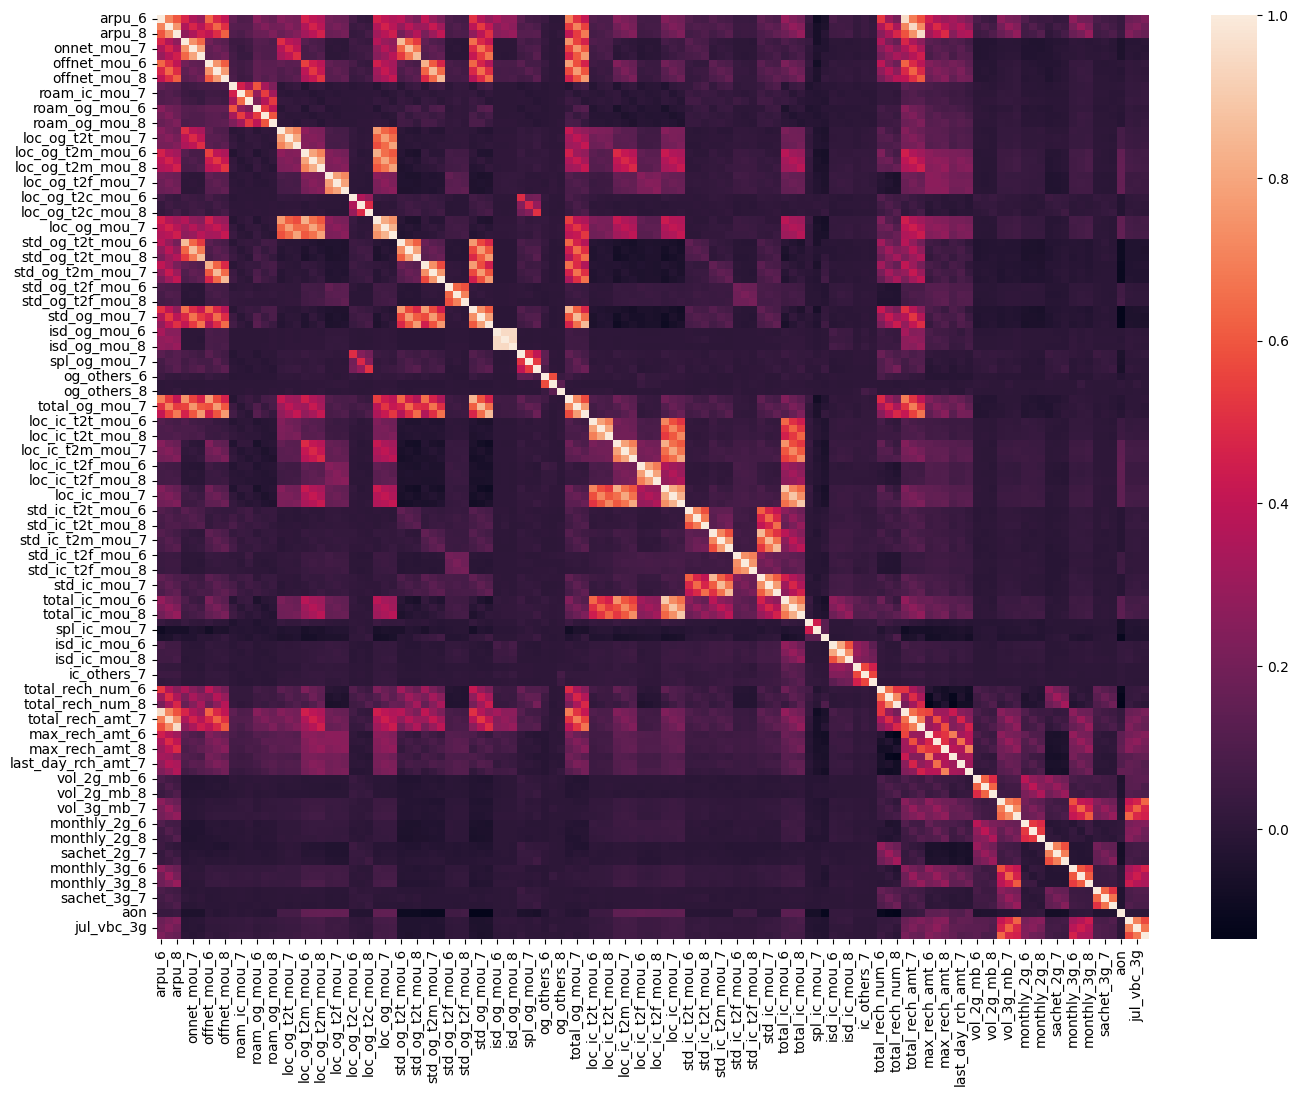

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(X_train[X_train.columns[X_train.columns.isin(col_custom_impute +
                                                         col_gen_impute +
                                                         col_unchanged)==True].tolist()].corr())
plt.show()

**Key Observations:**
1. High Correlation:
  - Certain features have a strong correlation (values close to 1), indicated by brighter colors on the heatmap.
  - This implies potential redundancy, as these features are likely providing similar information.

2. Low or Negative Correlation:
  - Some features show low or even negative correlation with others, indicating that they provide unique or independent information.

3. Block Structures:
  - Blocks of strong correlations suggest feature groupings where subsets of features are closely related, likely measuring related concepts.

**Techniques to Address Observations:**

1. Feature Selection:
  - Use correlation thresholding to drop features with high pairwise correlations (e.g., drop one feature from a pair with a correlation > 0.9).
  - Techniques like Variance Inflation Factor (VIF) can also help identify multicollinearity and remove redundant features.
  - Use techniques such as RFE

2. Dimensionality Reduction:
  - Apply Principal Component Analysis (PCA) to reduce the feature space while retaining most of the variance in the data.

3. Regularization:
- Use algorithms like LASSO (L1 Regularization) or Elastic Net, which penalize less important or redundant features, making the model simpler.

4. Model-Based Feature Importance:
- Train models like Random Forest or Gradient Boosting, and use feature importance scores to decide which features to keep or discard.


### Correlation Analysis with grouped subset of columns

In [ ]:
amount_data = final_df.loc[:, final_df.columns.str.contains('amt')]
data2g = final_df.loc[:, final_df.columns.str.contains('2g')]
data3g = final_df.loc[:, final_df.columns.str.contains('3g')]
ic_mou_data = final_df.loc[:, final_df.columns.str.contains('ic') & final_df.columns.str.contains('mou')]
net_mou_data = final_df.loc[:, final_df.columns.str.contains('net_mou')]
og_mou_data = final_df.loc[:, final_df.columns.str.contains('og') & final_df.columns.str.contains('mou')]
rech_data = final_df.loc[:, final_df.columns.str.contains('rech')]
total_data = final_df.loc[:, final_df.columns.str.contains('tot')]

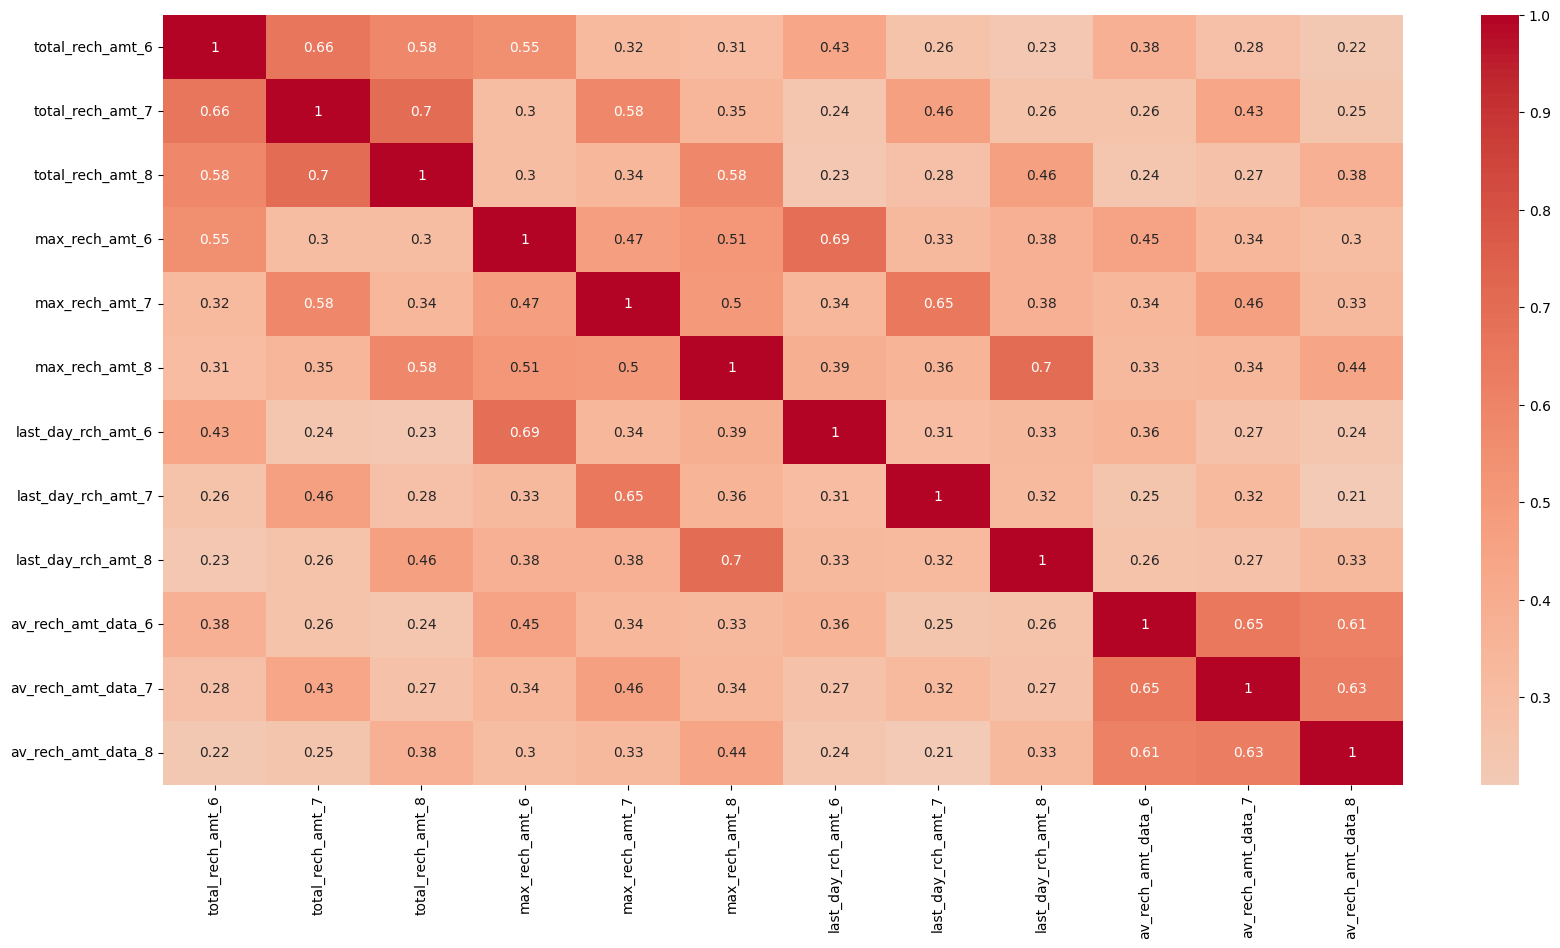

In [ ]:
#Checking the corelation for Amount data
plt.subplots(figsize = (20,10))
#Plotting heatmap of numerical features
sns.heatmap(round(amount_data.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

**Observations:**

A substantial correlation of 70% exists between the total recharge amount in month 7 and month 8.
Similarly, a notable correlation of 69% is observed between the maximum recharge amount in month 8 and the last day's recharge amount in the same month.
This suggests that customers who are unlikely to churn tend to recharge higher amounts in month 8.

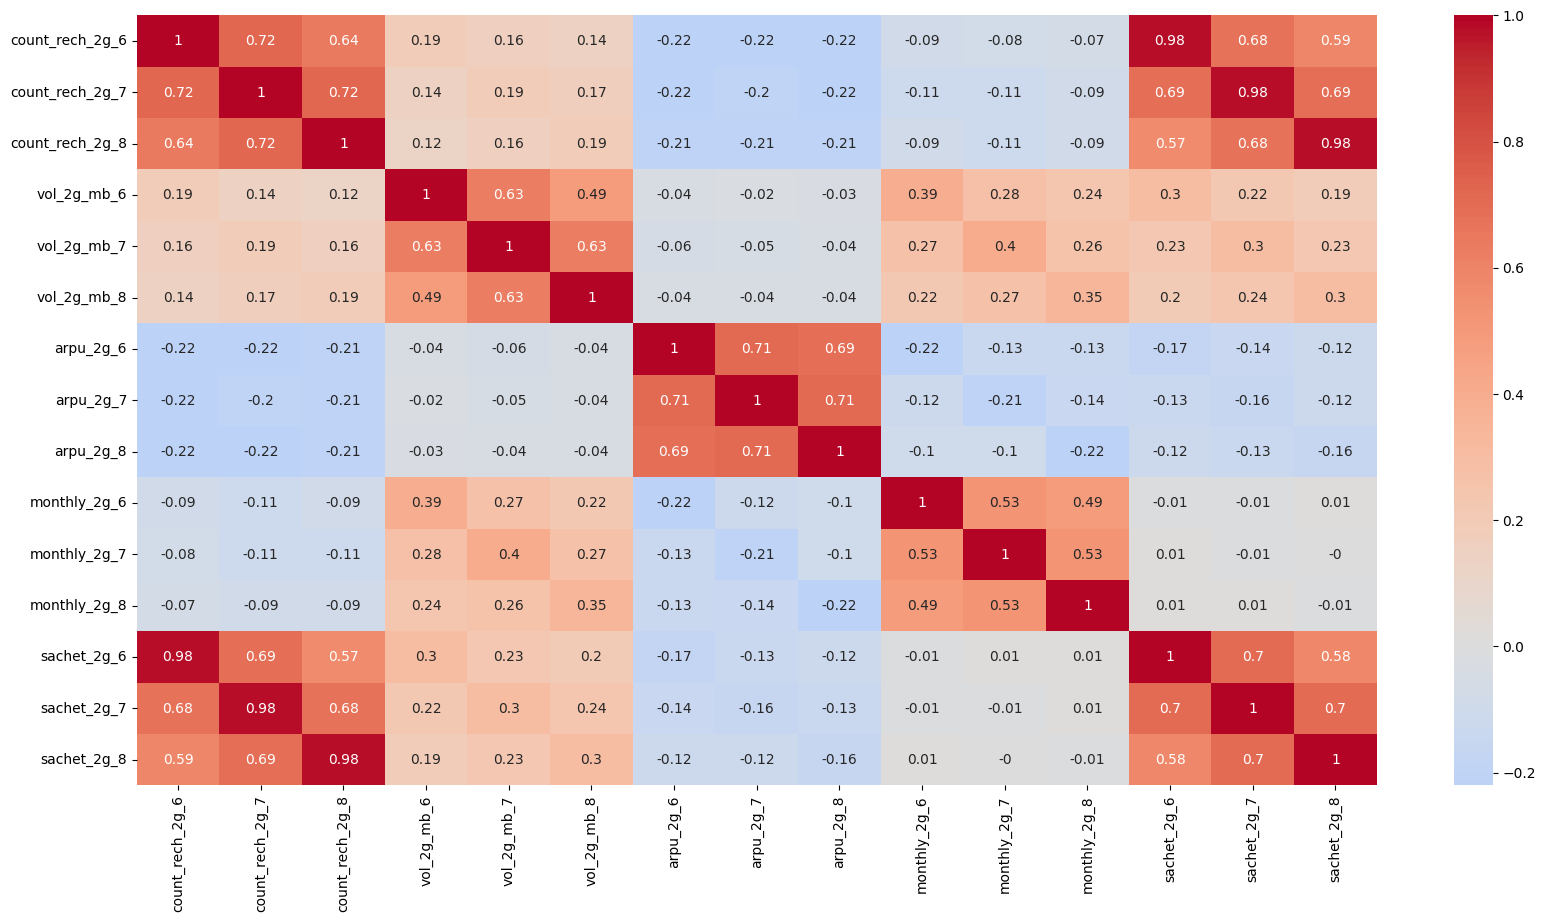

In [ ]:
# data2g
plt.subplots(figsize = (20,10))
#Plotting heatmap of numerical features
sns.heatmap(round(data2g.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

Observations:

There is a strong correlation between recharge quantities in months 7 and 8.

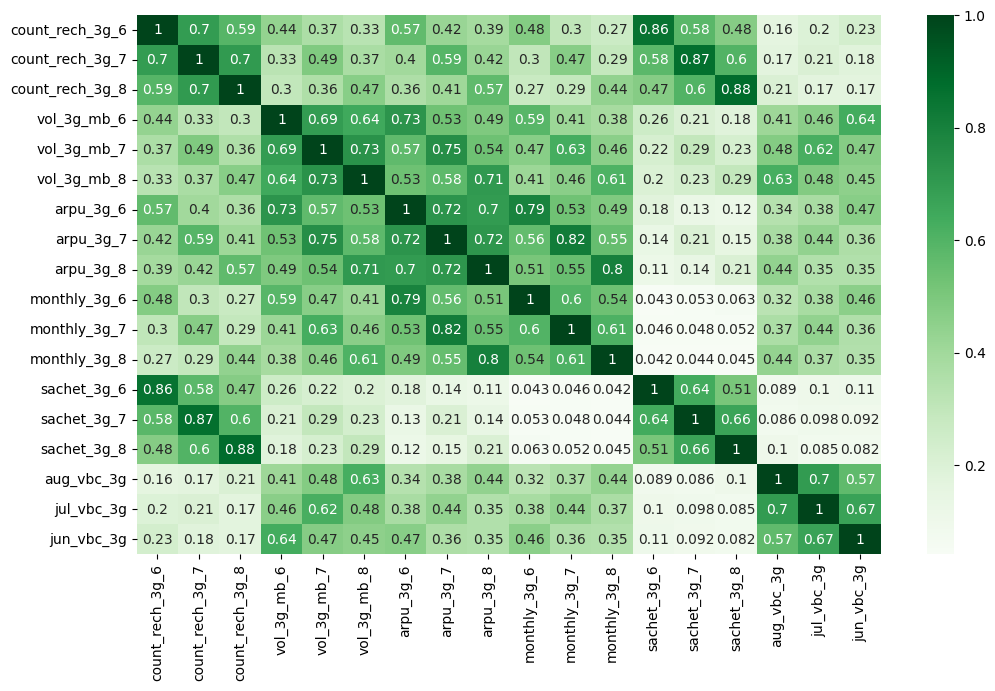

In [ ]:
#data3g
plt.figure(figsize=(12,7))
sns.heatmap(data3g.corr(),annot=True, cmap='Greens')
plt.show()

**Observations:**

There is a strong correlation between recharge quantities in months 7 and 8.

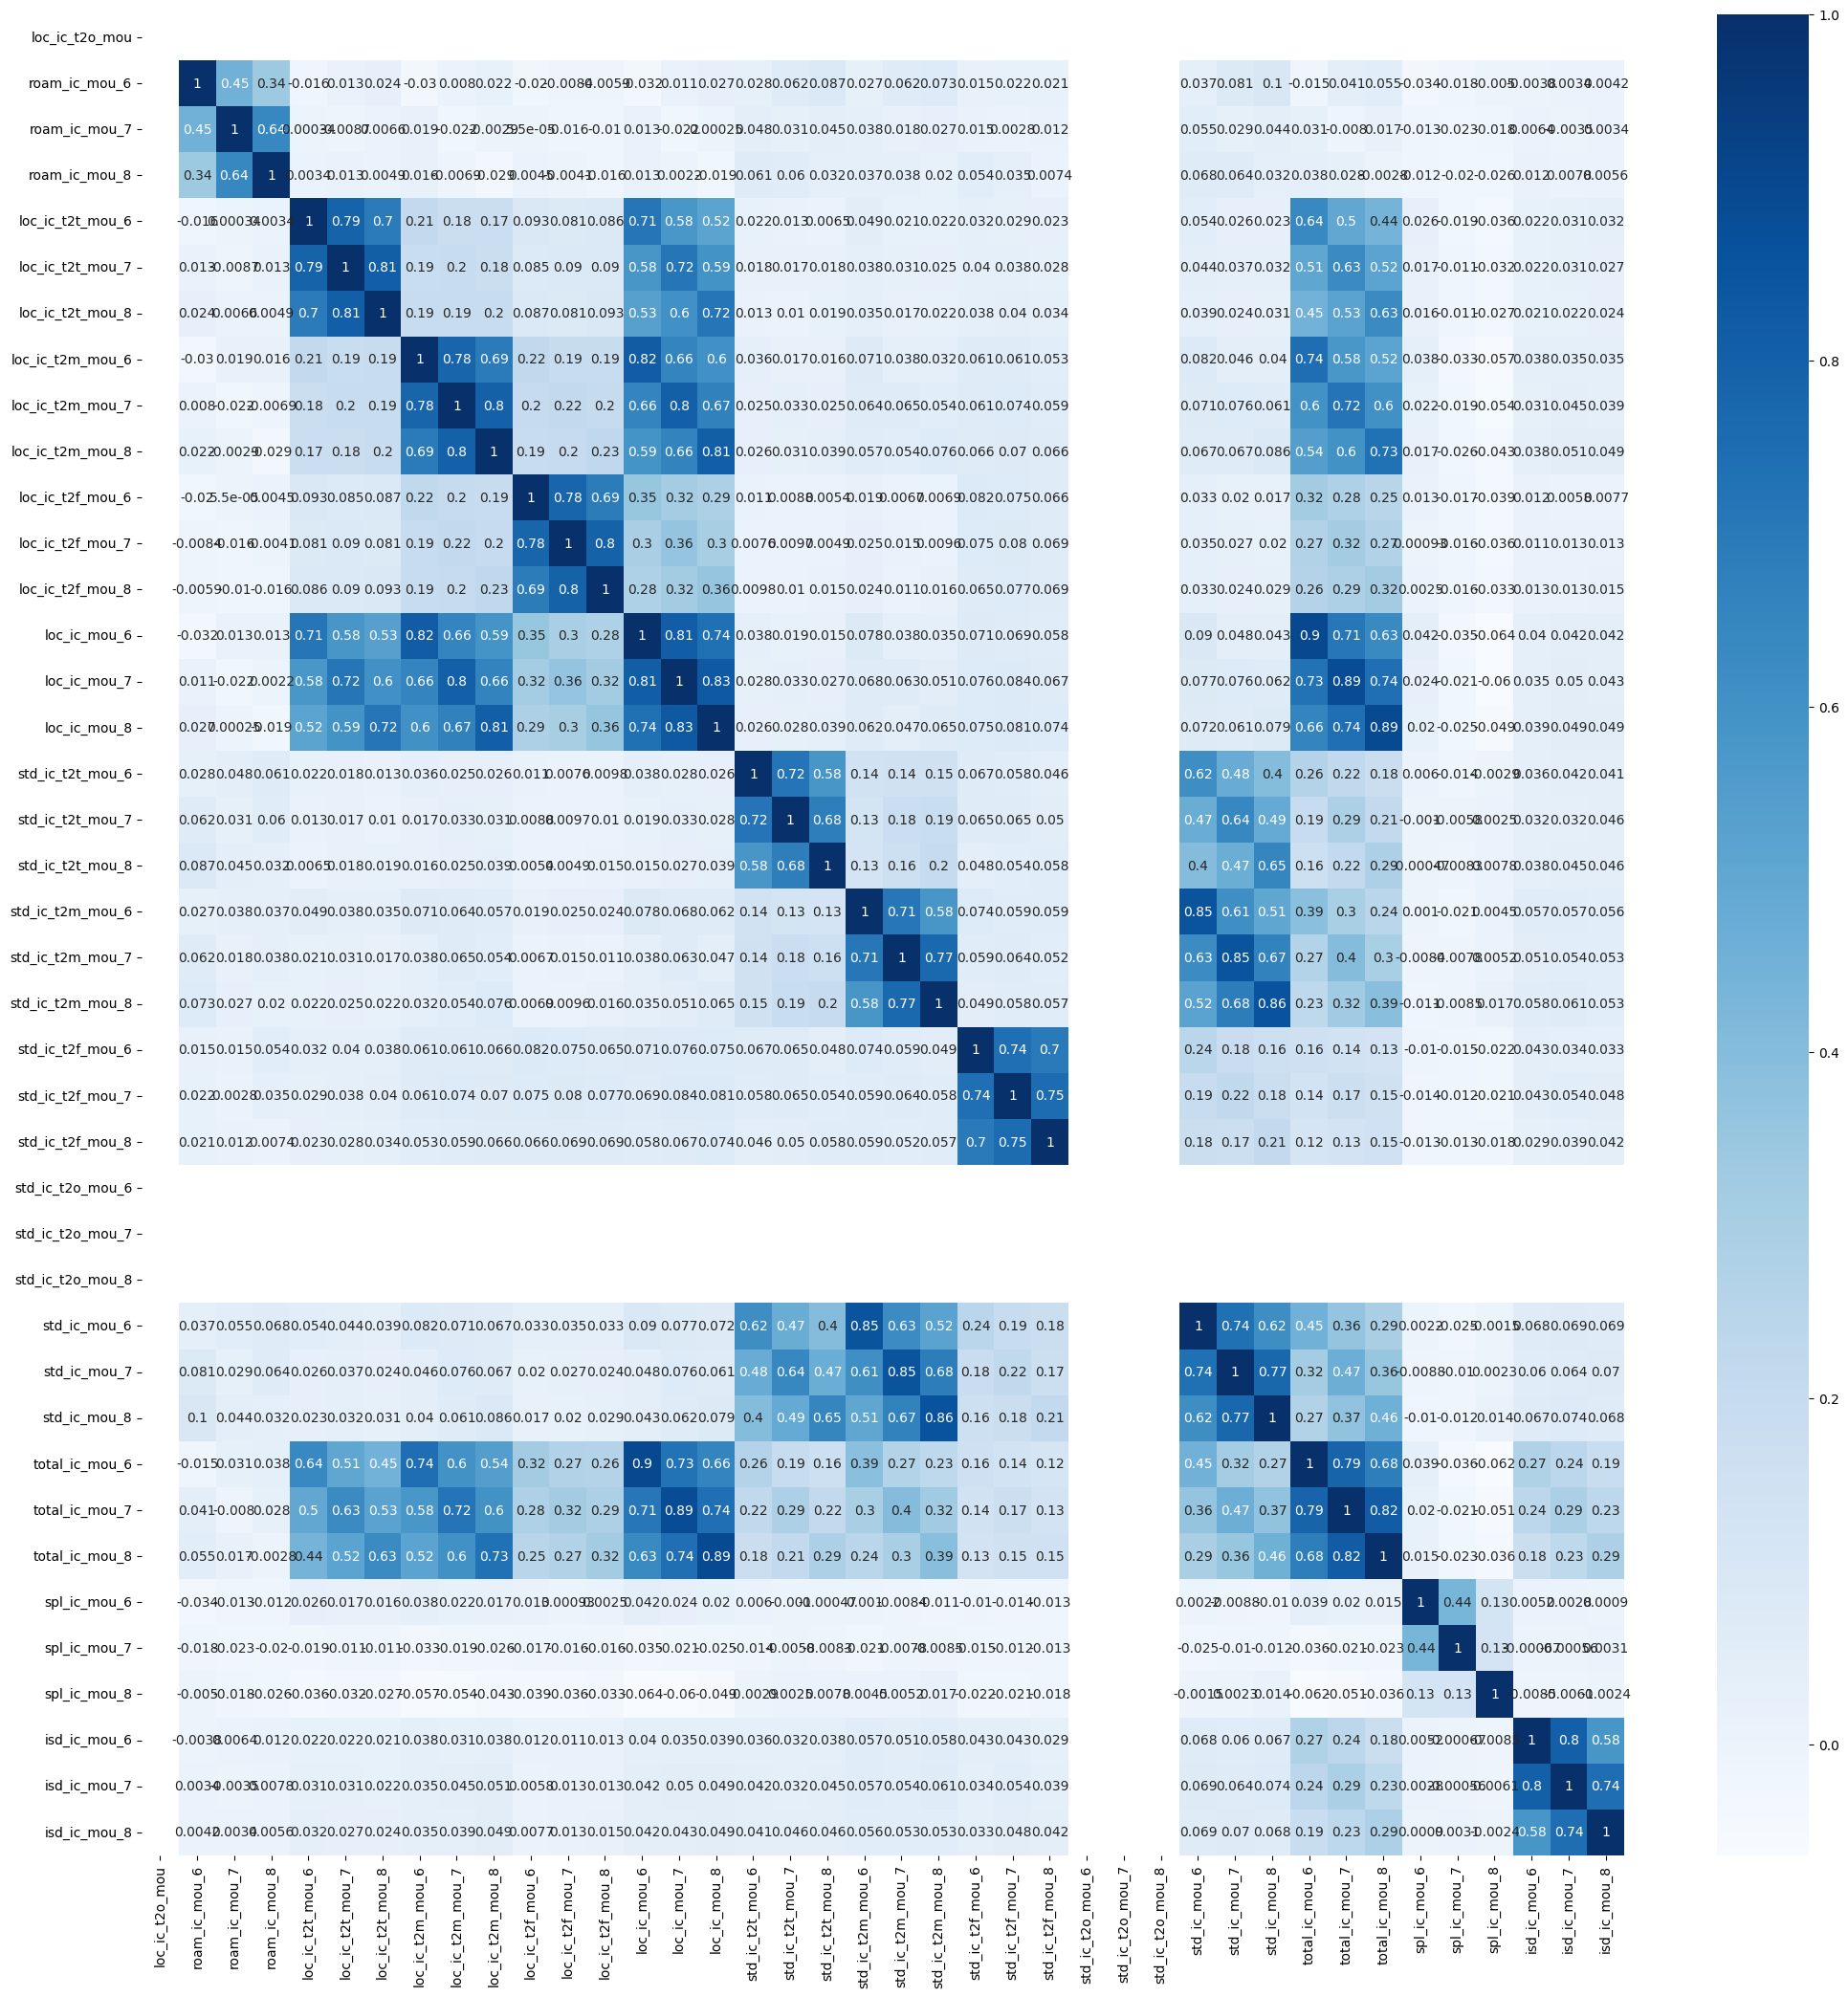

In [ ]:
#ic_mou_data
plt.figure(figsize=(25, 25))
sns.heatmap(ic_mou_data.corr(), annot=True, cmap='Blues')
plt.show()

**Observations:**

The following variables or features exhibit a remarkably high correlation:

total_ic_mou_6 and loc_ic_mou_6
total_ic_mou_7 and loc_ic_mou_7
total_ic_mou_8 and loc_ic_mou_8
std_ic_mou_6 and std_ic_t2f_mou_6
std_ic_mou_7 and std_ic_t2f_mou_7
std_ic_mou_8 and std_ic_t2f_mou_8

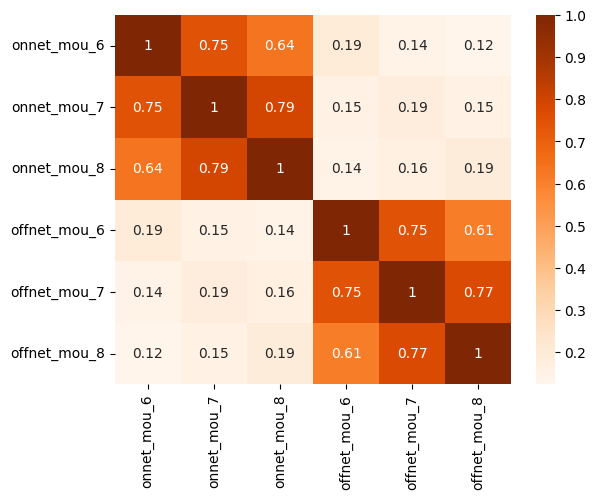

In [ ]:
#net_mou_data
sns.heatmap(net_mou_data.corr(), annot=True, cmap='Oranges')
plt.show()

**Observations:**

There is no correlation between the usage minutes for on-net and off-net calls.
However, a significant correlation is observed between the on-net and off-net usage minutes in both months 7 and 8.

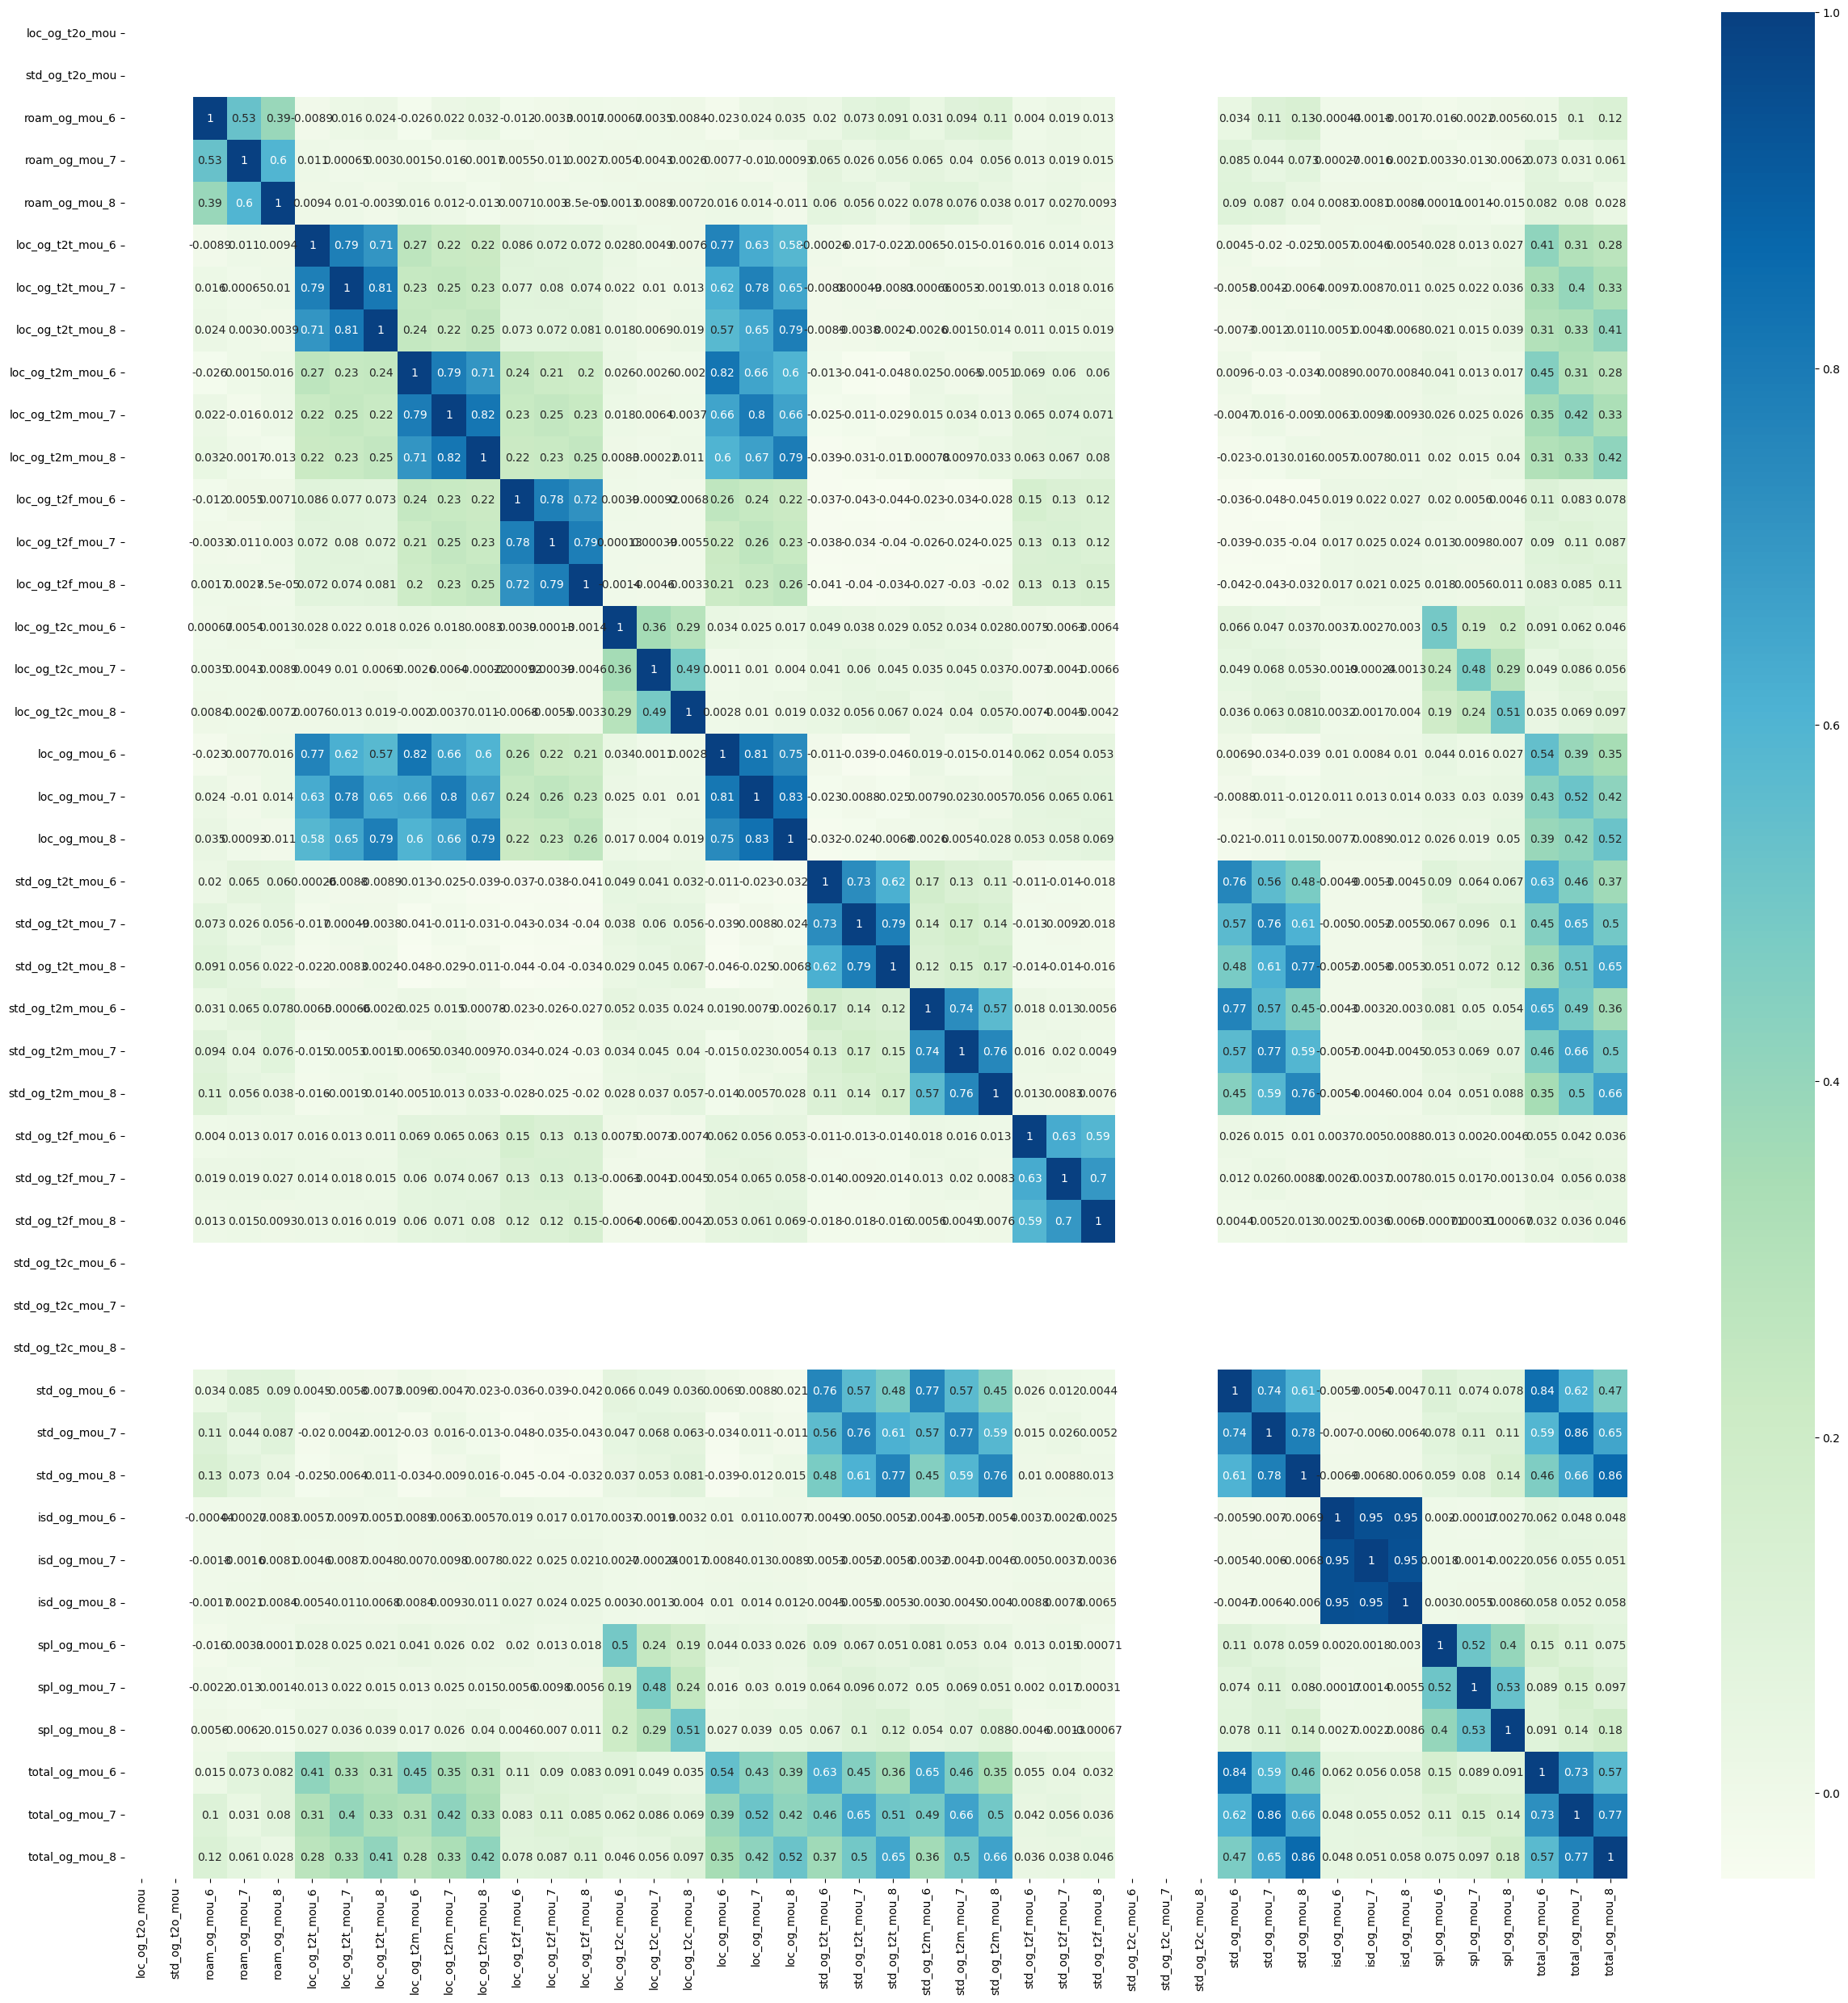

In [ ]:
#og_mou_data
plt.figure(figsize=(30,30))
sns.heatmap(og_mou_data.corr(), annot=True, cmap='GnBu')
plt.show()

***Observations:***

There exists a very high correlation between the following variables/features:
isd_og_mou_7 and isd_og_mou_6
isd_og_mou_8 and isd_og_mou_6
isd_og_mou_8 and isd_og_mou_7
total_og_mou_6 and std_og_mou_6
total_og_mou_7 and std_og_mou_7
total_og_mou_8 and std_og_mou_8

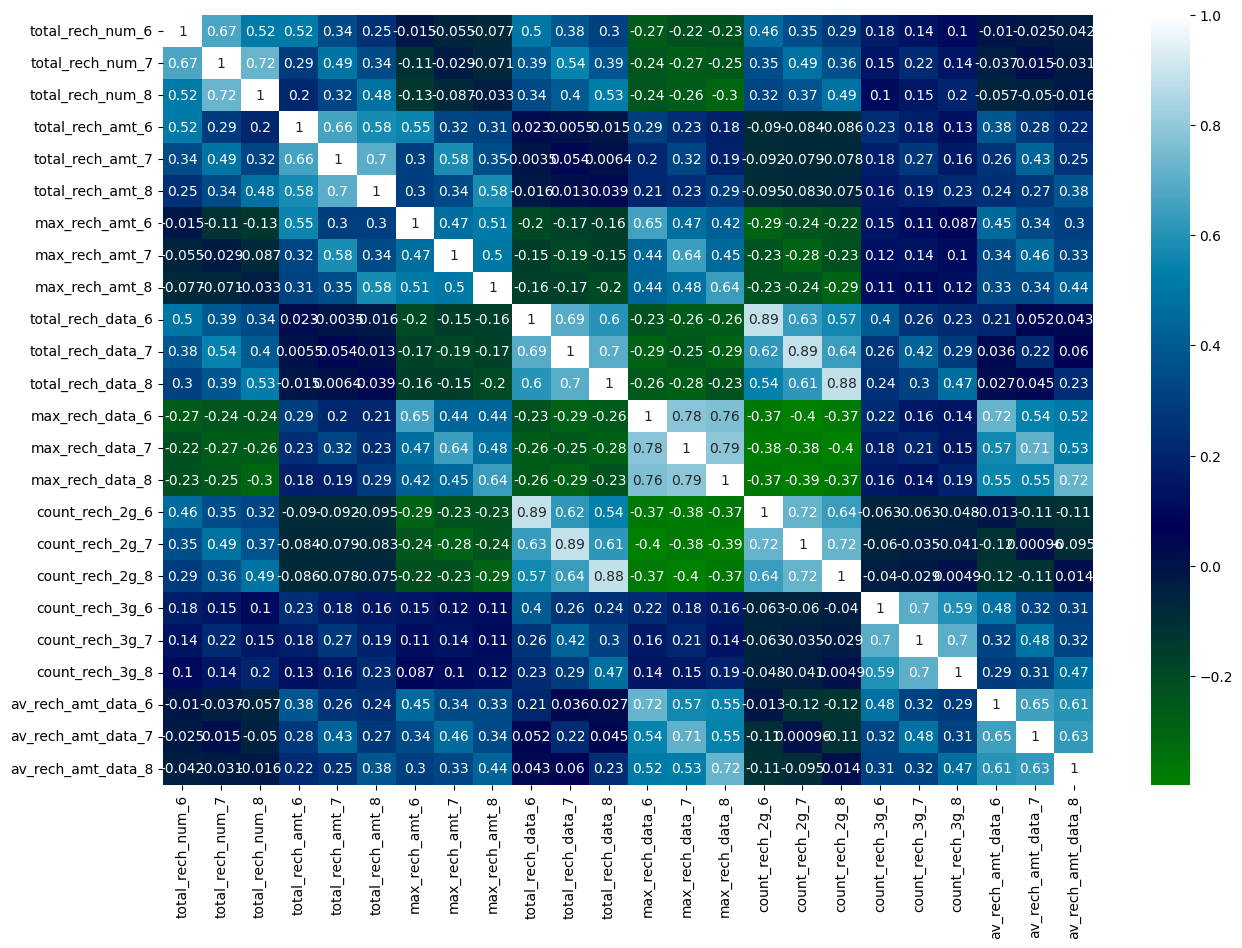

In [ ]:
#rech_data
plt.figure(figsize=(15,10))
rech_data_numeric = rech_data.select_dtypes(include=np.number)
sns.heatmap(rech_data_numeric.corr(), annot=True, cmap='ocean')
plt.show()

**Observations:**

There is a notable correlation between the average recharge amount and the recharge amount for both months 6 and 7.
A significant correlation of 72% exists between the total recharge for month 7 and the recharge for month 8.
Any factor correlated with month 8 is likely correlated with churn prediction.

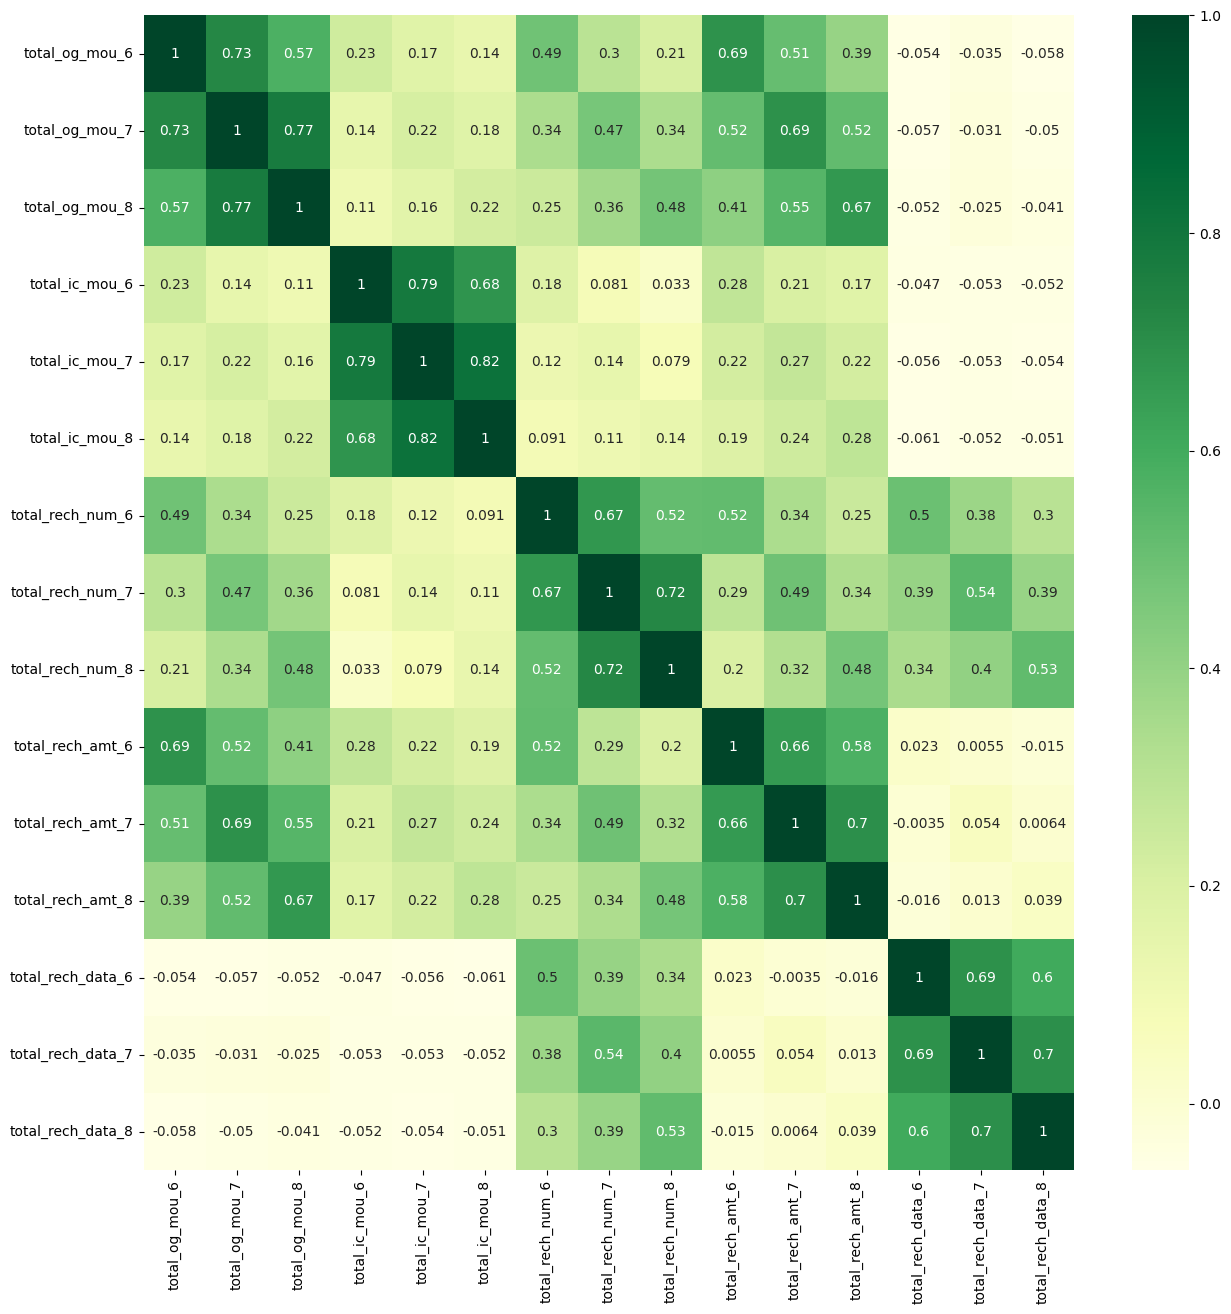

In [ ]:
#total_data
plt.figure(figsize=(15,15))
sns.heatmap(total_data.corr(), annot=True, cmap='YlGn')
plt.show()

**Observations:**

There exists a remarkably high correlation between the incoming (82%) and outgoing minutes (77%) of usage in months 7 and 8.
Heavy usage suggests that customers are less likely to churn.

# Feature Engineering and Column Transformation

- Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
- Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data

This section aims to improve the dataset for churn prediction by engineering new features:

**Number of Days Fields:**

Calculates the difference in days between two dates, such as the last date of the month and the last recharge date.
This feature captures the frequency of recharge and reveals how recently the customer used the service.


**Trend Variables:**

For consecutive monthly usage variables, it calculates the difference between the last month's usage and the average of the previous two months.
These variables highlight the change or trend in customer behaviour. A decline indicates a potential churn risk.
These new features provide insights into customer behaviour and help the model identify patterns related to churn.

In [ ]:
# Usage columns

# Contains 6,7,8 and does not contain 'date'
col_temp_usage = X_train.columns[X_train.columns.isin(X_train.filter(regex='^(?!.*date)[\s\S]*[678]$'))].tolist()
col_temp_usage

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'to

In [ ]:
col_fe_usage_vars = []

df=X_train

for col in col_temp_usage:
    if col.endswith('_6'):
        base_name = col[:-2]  # Remove '_6' to get the base name
        # Calculate the trend variable
        trend_name = f"trend_{base_name}"
        df[trend_name] = df[f"{base_name}_8"] - ((df[f"{base_name}_6"] + df[f"{base_name}_7"]) / 2)
        col_fe_usage_vars.append(trend_name)

# Display the DataFrame with the trend variables
print("Trend variables added:")
print(df[col_fe_usage_vars].shape)

Trend variables added:
(55999, 51)


In [ ]:
col_fe_usage_vars

['trend_arpu',
 'trend_onnet_mou',
 'trend_offnet_mou',
 'trend_roam_ic_mou',
 'trend_roam_og_mou',
 'trend_loc_og_t2t_mou',
 'trend_loc_og_t2m_mou',
 'trend_loc_og_t2f_mou',
 'trend_loc_og_t2c_mou',
 'trend_loc_og_mou',
 'trend_std_og_t2t_mou',
 'trend_std_og_t2m_mou',
 'trend_std_og_t2f_mou',
 'trend_std_og_t2c_mou',
 'trend_std_og_mou',
 'trend_isd_og_mou',
 'trend_spl_og_mou',
 'trend_og_others',
 'trend_total_og_mou',
 'trend_loc_ic_t2t_mou',
 'trend_loc_ic_t2m_mou',
 'trend_loc_ic_t2f_mou',
 'trend_loc_ic_mou',
 'trend_std_ic_t2t_mou',
 'trend_std_ic_t2m_mou',
 'trend_std_ic_t2f_mou',
 'trend_std_ic_t2o_mou',
 'trend_std_ic_mou',
 'trend_total_ic_mou',
 'trend_spl_ic_mou',
 'trend_isd_ic_mou',
 'trend_ic_others',
 'trend_total_rech_num',
 'trend_total_rech_amt',
 'trend_max_rech_amt',
 'trend_last_day_rch_amt',
 'trend_total_rech_data',
 'trend_max_rech_data',
 'trend_count_rech_2g',
 'trend_count_rech_3g',
 'trend_av_rech_amt_data',
 'trend_vol_2g_mb',
 'trend_vol_3g_mb',
 'tren

In [ ]:
class CustomFeatureEngineering(BaseEstimator, TransformerMixin):
    """
    Custom feature engineering for telecom churn prediction.

    This transformer performs the following operations:

    1. Converts date columns to datetime objects.
    2. Imputes missing values in 'last_date_of_month' columns using the mode.
    3. Calculates the difference in days between recharge dates and the last date of the month.
    4. Creates new features representing these date differences.

    Returns a DataFrame with the new engineered features.
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X_trans = pd.DataFrame()

        # Convert columns to datetime objects before subtraction
        for col in ['last_date_of_month_6', 'date_of_last_rech_6', 'last_date_of_month_7',
                    'date_of_last_rech_7', 'last_date_of_month_8', 'date_of_last_rech_8',
                    'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']:
            X[col] = pd.to_datetime(X[col], errors='coerce')  # Handle potential errors during conversion

        # Impute last_date_of_month coulms with the most frequent value
        X['last_date_of_month_6'] = X['last_date_of_month_6'].fillna(X['last_date_of_month_6'].mode()[0])
        X['last_date_of_month_7'] = X['last_date_of_month_7'].fillna(X['last_date_of_month_8'].mode()[0])
        X['last_date_of_month_8'] = X['last_date_of_month_7'].fillna(X['last_date_of_month_8'].mode()[0])

        X_trans['date_diff_rech_6'] = (X['last_date_of_month_6'] - X['date_of_last_rech_6']).dt.days
        X_trans['date_diff_rech_7'] = (X['last_date_of_month_7'] - X['date_of_last_rech_7']).dt.days
        X_trans['date_diff_rech_8'] = (X['last_date_of_month_8'] - X['date_of_last_rech_8']).dt.days

        X_trans['date_diff_rech_data_6'] = (X['last_date_of_month_6'] - X['date_of_last_rech_data_6']).dt.days
        X_trans['date_diff_rech_data_7'] = (X['last_date_of_month_7'] - X['date_of_last_rech_data_7']).dt.days
        X_trans['date_diff_rech_data_8'] = (X['last_date_of_month_8'] - X['date_of_last_rech_data_8']).dt.days


        for col in col_temp_usage:
            if col.endswith('_6'):
                base_name = col[:-2]  # Remove '_6' to get the base name
                # Calculate the trend variable
                trend_name = f"trend_{base_name}"
                X_trans[trend_name] = X[f"{base_name}_8"] - ((X[f"{base_name}_6"] + X[f"{base_name}_7"]) / 2)

        return X_trans

    def get_feature_names_out(self, input_features=None):

        return ['date_diff_rech_6', 'date_diff_rech_7', 'date_diff_rech_8', 'date_diff_rech_data_6', 'date_diff_rech_data_7', 'date_diff_rech_data_8'] + col_fe_usage_vars

In [ ]:
feature_engineering_pipeline = imbPipeline([
                                  ('fe', CustomFeatureEngineering()),
                                  ('fe_simple_imputer', SimpleImputer(strategy='constant', fill_value=0)),
                                  ])

feature_engineering_pipeline

Pipeline(steps=[('fe', CustomFeatureEngineering()),
                ('fe_simple_imputer',
                 SimpleImputer(fill_value=0, strategy='constant'))])

In [ ]:
transformed_data = feature_engineering_pipeline.fit_transform(X_train[col_dates+col_temp_usage])

pd.DataFrame(transformed_data, columns=feature_engineering_pipeline.get_feature_names_out())

date_diff_rech_6  date_diff_rech_7  date_diff_rech_8  \
0                   3.0               6.0              -6.0   
1                   0.0              10.0             -28.0   
2                   1.0               2.0             -10.0   
3                   1.0               8.0             -24.0   
4                   1.0              15.0             -19.0   
...                 ...               ...               ...   
55994               9.0               8.0             -31.0   
55995               0.0              10.0             -28.0   
55996              11.0              16.0             -30.0   
55997               0.0               4.0             -28.0   
55998               2.0               7.0             -26.0   

       date_diff_rech_data_6  date_diff_rech_data_7  date_diff_rech_data_8  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
55994                    0.0                    0.0                    0.0   
55995                    0.0                    0.0                    0.0   
55996                   11.0                   19.0                  -30.0   
55997                    8.0                    4.0                    0.0   
55998                    7.0                    0.0                    0.0   

       trend_arpu  trend_onnet_mou  trend_offnet_mou  trend_roam_ic_mou  ...  \
0         83.2370           31.405           127.175              0.000  ...   
1        -57.2400           -4.360           -47.915              0.000  ...   
2        -34.2815           -9.135           -14.700              0.000  ...   
3          0.3915          -81.055            59.065              0.000  ...   
4       -306.3935            0.000             0.000              0.000  ...   
...           ...              ...               ...                ...  ...   
55994     55.6280         -144.805           -39.500             -2.615  ...   
55995     16.9475           16.720            -0.960              0.000  ...   
55996     75.8240            0.000             0.000              0.000  ...   
55997   -201.1085          -77.320            17.475              0.000  ...   
55998    -11.3890          -19.155            80.380              0.000  ...   

       trend_vol_2g_mb  trend_vol_3g_mb  trend_arpu_3g  trend_arpu_2g  \
0                0.000            0.000           0.00          0.000   
1                0.000            0.000           0.00          0.000   
2                0.000            0.000           0.00          0.000   
3                0.000            0.000           0.00          0.000   
4                0.000            0.000           0.00          0.000   
...                ...              ...            ...            ...   
55994            0.000            0.000           0.00          0.000   
55995            0.000            0.000           0.00          0.000   
55996            9.080          -10.845          76.13         75.335   
55997           -8.385         -666.855           0.00          0.000   
55998          -82.470            0.000           0.00          0.000   

       trend_night_pck_user  trend_monthly_2g  trend_sachet_2g  \
0                       0.0               0.0              0.0   
1                       0.0               0.0              0.0   
2                       0.0               0.0              0.0   
3                       0.0               0.0              0.0   
4                       0.0               0.0              0.0   
...                     ...               ...              ...   
55994        

# Column Transformer

**Define Data Preprocessing with ColumnTransformer**

This section defines a data preprocessing pipeline using `ColumnTransformer` from scikit-learn. The pipeline applies different transformations to different subsets of columns in the dataset.

**Steps:**

1. **Custom Feature Engineering (`custom_fe`):**
   - Applies the `feature_engineering_pipeline` to the `col_dates` columns.
   - This pipeline performs custom feature engineering steps, such as calculating date differences.
2. **Custom Imputation (`impute_columns_custom`):**
   - Applies `SimpleImputer` with `strategy='constant'` and `fill_value=0` to the `col_custom_impute` columns.
   - This imputes missing values in these columns with 0.
3. **Generic Imputation (`impute_columns_generic`):**
   - Applies `SimpleImputer` with `strategy='constant'` and `fill_value=0` to the `col_gen_impute` columns.
   - This imputes missing values in these columns with 0.
4. **Dropping Columns (`drop_columns`):**
   - Drops the columns specified in `col_drop`.
5. **Passing Through Unchanged Columns (`unchanged_cols`):**
   - Passes the columns specified in `col_unchanged` through without any transformation.

**Parameters:**

- `transformers`: A list of tuples defining the transformations to apply. Each tuple contains:
   - A name for the transformer (e.g., 'custom_fe').
   - The transformer object (e.g., `feature_engineering_pipeline`).
   - The columns to apply the transformer to (e.g., `col_dates`).
- `verbose_feature_names_out`: If True, the transformed feature names will include the transformer name as a prefix.

**Usage:**

The `preprocessor` object is created and then fit to the training data using `preprocessor.fit(X_train)`. It can then be used to transform both the training and test data using `preprocessor.transform(X_train)` and `preprocessor.transform(X_test)`.

**Output:**

The output of the `preprocessor` is a transformed dataset where the specified transformations have been applied to the corresponding columns.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('custom_fe', feature_engineering_pipeline, col_dates+col_temp_usage),
        ('impute_columns_custom', SimpleImputer(strategy='constant', fill_value=0), col_custom_impute),
        ('impute_columns_generic', SimpleImputer(strategy='constant', fill_value=0), col_gen_impute),
        ('drop_columns', 'drop', col_drop),
        ('unchanged_cols', 'passthrough', col_unchanged)
    ],
    verbose_feature_names_out=True
)

preprocessor

ColumnTransformer(transformers=[('custom_fe',
                                 Pipeline(steps=[('fe',
                                                  CustomFeatureEngineering()),
                                                 ('fe_simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant'))]),
                                 ['last_date_of_month_6',
                                  'last_date_of_month_7',
                                  'last_date_of_month_8', 'date_of_last_rech_6',
                                  'date_of_last_rech_7', 'date_of_last_rech_8',
                                  'date_of_last_rech_data_6',
                                  'date_of_last_rech_d...
                                  'total_rech_amt_7', 'total_rech_amt_8',
                                  'max_rech_amt_6', 'max_rech_amt_7',
                                  'max_rech_amt_8', 'last_day_rch_amt_6',
                                  'last_day_rch_amt_7', 'last_day_rch_amt_8',
                                  'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
                                  'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
                                  'monthly_2g_6', 'monthly_2g_7',
                                  'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
                                  'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
                                  'monthly_3g_8', ...])])

In [ ]:
preprocessor.fit_transform(X_train)

preprocessor.get_feature_names_out()

array(['custom_fe__date_diff_rech_6', 'custom_fe__date_diff_rech_7',
       'custom_fe__date_diff_rech_8', 'custom_fe__date_diff_rech_data_6',
       'custom_fe__date_diff_rech_data_7',
       'custom_fe__date_diff_rech_data_8', 'custom_fe__trend_arpu',
       'custom_fe__trend_onnet_mou', 'custom_fe__trend_offnet_mou',
       'custom_fe__trend_roam_ic_mou', 'custom_fe__trend_roam_og_mou',
       'custom_fe__trend_loc_og_t2t_mou',
       'custom_fe__trend_loc_og_t2m_mou',
       'custom_fe__trend_loc_og_t2f_mou',
       'custom_fe__trend_loc_og_t2c_mou', 'custom_fe__trend_loc_og_mou',
       'custom_fe__trend_std_og_t2t_mou',
       'custom_fe__trend_std_og_t2m_mou',
       'custom_fe__trend_std_og_t2f_mou',
       'custom_fe__trend_std_og_t2c_mou', 'custom_fe__trend_std_og_mou',
       'custom_fe__trend_isd_og_mou', 'custom_fe__trend_spl_og_mou',
       'custom_fe__trend_og_others', 'custom_fe__trend_total_og_mou',
       'custom_fe__trend_loc_ic_t2t_mou',
       'custom_fe__trend_loc

In [ ]:
transformed_data = preprocessor.fit_transform(X_train)

pd.DataFrame(transformed_data, columns=preprocessor.get_feature_names_out())

custom_fe__date_diff_rech_6  custom_fe__date_diff_rech_7  \
0                              3.0                          6.0   
1                              0.0                         10.0   
2                              1.0                          2.0   
3                              1.0                          8.0   
4                              1.0                         15.0   
...                            ...                          ...   
55994                          9.0                          8.0   
55995                          0.0                         10.0   
55996                         11.0                         16.0   
55997                          0.0                          4.0   
55998                          2.0                          7.0   

       custom_fe__date_diff_rech_8  custom_fe__date_diff_rech_data_6  \
0                             -6.0                               0.0   
1                            -28.0                               0.0   
2                            -10.0                               0.0   
3                            -24.0                               0.0   
4                            -19.0                               0.0   
...                            ...                               ...   
55994                        -31.0                               0.0   
55995                        -28.0                               0.0   
55996                        -30.0                              11.0   
55997                        -28.0                               8.0   
55998                        -26.0                               7.0   

       custom_fe__date_diff_rech_data_7  custom_fe__date_diff_rech_data_8  \
0                                   0.0                               0.0   
1                                   0.0                               0.0   
2                                   0.0                               0.0   
3                                   0.0                               0.0   
4                                   0.0                               0.0   
...                                 ...                               ...   
55994                               0.0                               0.0   
55995                               0.0                               0.0   
55996                              19.0                             -30.0   
55997                               4.0                               0.0   
55998                               0.0                               0.0   

       custom_fe__trend_arpu  custom_fe__trend_onnet_mou  \
0                    83.2370                      31.405   
1                   -57.2400                      -4.360   
2                   -34.2815                      -9.135   
3                     0.3915                     -81.055   
4                  -306.3935                       0.000   
...                      ...                         ...   
55994                55.6280                    -144.805   
55995                16.9475                      16.720   
55996                75.8240                       0.000   
55997              -201.1085                     -77.320   
55998               -11.3890                     -19.155   

       custom_fe__trend_offnet_mou  custom_fe__trend_roam_ic_mou  ...  \
0                          127.175                         0.000  ...   
1                          -47.915                         0.000  ...   
2                          -14.700                         0.000  ...   
3                           59.065                         0.000  ...   
4                            0.000                         0.000  ...   
...                            ...                           ...  ...   
55994                      -39.500                        -2.615  ...   
55995                       -0.960                         0.000  ...   
55996                        0.000

# Classification analysis definition

### Define classification_metrics_and_graphs

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

def classification_metrics_and_graphs(model, X_train, y_train, X_test, y_test):
    """
    Calculates and displays various classification metrics and graphs for a given model.

    This function evaluates the performance of a classification model by computing
    key metrics such as accuracy, precision, recall, F1-score, ROC AUC, and
    generating visualizations like ROC curve, Precision-Recall curve, and
    confusion matrix.

    Args:
        model: The trained classification model.
        X_train: The training data features.
        y_train: The training data target labels.
        X_test: The test data features.
        y_test: The test data target labels.

    """

    def plot_roc_curve(y_true, y_prob, label):
        fpr, tpr, thresholds = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')

    def plot_precision_recall_curve(y_true, y_prob, label):
        precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
        plt.plot(recall, precision, label=label)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()

    print('\n---------------------------------')
    print('Classification Metrics and Graphs')
    print('---------------------------------')

    print("\nData Shape:")
    print("X_train, y_train, X_test, y_test")
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


    #print("\nFeatures: ", "Total= ", len(model.named_steps['preprocessor'].get_feature_names_out()))
    #print(model.named_steps['preprocessor'].get_feature_names_out())


    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Get predicted probabilities (for ROC AUC and PR curves)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_test_prob = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report (Train Set):")
    print(classification_report(y_train, y_train_pred))

    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    if y_train_prob is not None and y_test_prob is not None:
      print("ROC AUC (Train Set):", roc_auc_score(y_train, y_train_prob))
      print("ROC AUC (Test Set):", roc_auc_score(y_test, y_test_prob))
      plt.figure(figsize=(6, 4))
      plot_roc_curve(y_test, y_test_prob, "Test Set")
      plot_roc_curve(y_train, y_train_prob, "Train Set")
      plt.show()

      plt.figure(figsize=(6, 4))
      plot_precision_recall_curve(y_test, y_test_prob, "Test Set")
      plot_precision_recall_curve(y_train, y_train_prob, "Train Set")
      plt.show()

    else:
      print("Probabilities not provided for ROC AUC and PR curves")


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

### Define model_metrics_at_thresholds

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def model_metrics_at_thresholds(model, X, y):
    """
    Calculates and plots sensitivity, specificity, and accuracy for each threshold.

    Args:
      model: Trained model.
      X: Features (input data).
      y: True labels.
    """
    # Get predicted probabilities
    y_prob = model.predict_proba(X)[:, 1]

    # Define thresholds to evaluate
    thresholds = np.arange(0.0, 1.1, 0.1)

    # Create an empty list to store metrics (instead of DataFrame)
    metrics_list = []

    # Function to calculate sensitivity, specificity, and accuracy from confusion matrix
    def model_metrics_thres(matrix):
        TN = matrix[0][0]
        TP = matrix[1][1]
        FP = matrix[0][1]
        FN = matrix[1][0]
        accuracy = round((TP + TN) / float(TP + TN + FP + FN), 3)
        sensitivity = round(TP / float(FN + TP), 3)
        specificity = round(TN / float(TN + FP), 3)
        return sensitivity, specificity, accuracy

    # Evaluate for each threshold
    for threshold in thresholds:
        # Convert probabilities to binary predictions based on the threshold
        y_pred_thres = (y_prob >= threshold).astype(int)

        # Generate confusion matrix
        cm = confusion_matrix(y, y_pred_thres)

        # Get sensitivity, specificity, and accuracy for the current threshold
        sensitivity, specificity, accuracy = model_metrics_thres(cm)

        # Append metrics to the list
        metrics_list.append({
            'sensitivity': sensitivity,
            'specificity': specificity,
            'accuracy': accuracy
        })

    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list, index=thresholds)


    # Display the metrics DataFrame
    print(metrics_df)

    # Plot the metrics at each threshold
    plt.figure(figsize=(8, 5))

    # Plot sensitivity, specificity, and accuracy as separate lines
    plt.plot(metrics_df.index, metrics_df['sensitivity'], label='Sensitivity', marker='o', color='b')
    plt.plot(metrics_df.index, metrics_df['specificity'], label='Specificity', marker='o', color='g')
    plt.plot(metrics_df.index, metrics_df['accuracy'], label='Accuracy', marker='o', color='orange')

    # Set plot labels and title
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title('Sensitivity, Specificity, and Accuracy for Each Threshold')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Models for Feature Importance

## Logistic Regression

In [ ]:
lr_pipeline1 = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr')),
              ('scaler', StandardScaler()),
              ('lreg_classifier', LogisticRegression())
          ])


lr_pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'last_day_rch_amt_8',
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('lreg_classifier', LogisticRegression())])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     50289
           1       0.75      0.43      0.55      5710

    accuracy                           0.93     55999
   macro avg       0.85      0.71      0.75     55999
weighted avg       0.92      0.93      0.92     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     12578
           1       0.74      0.44      0.56      1422

    accuracy                           0.93     14000
   macro avg       0.84      0.71      0.76     14000
weighted avg       0.92      0.93      0.92     14000

ROC AUC (Train Set): 0.9010922820562995
ROC AUC (Test Set): 0.9087210853500599


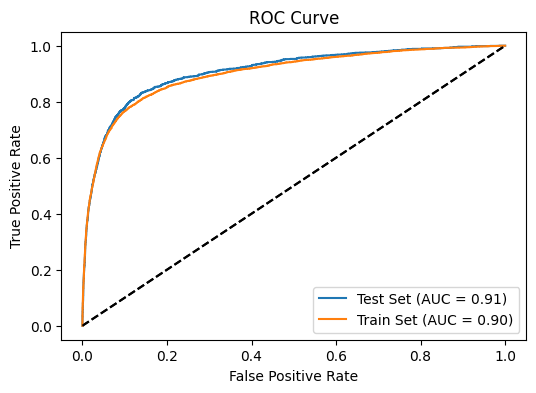

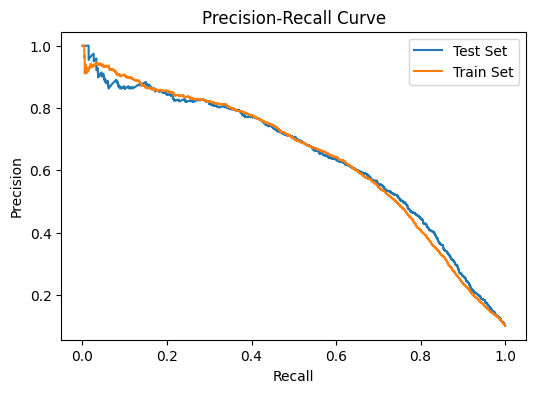

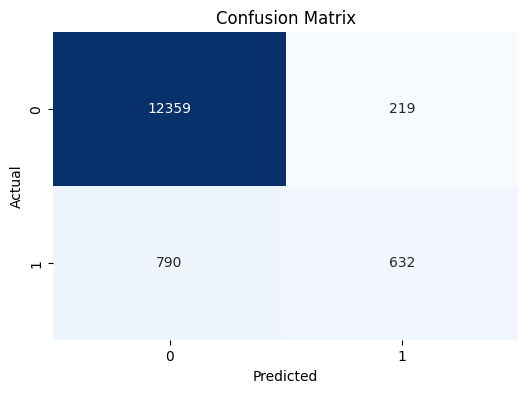

In [ ]:
lr_pipeline1.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline1, X_train, y_train, X_test, y_test)

Accuracy is fine, but recall is low. Dataset is unbalanced.

## Logistic Regression - with Balanced

**Addressing Class Imbalance with class_weight='balanced'**

In classification problems with imbalanced datasets (one class having significantly more samples than others), models can become biased towards the majority class. This can lead to poor performance in identifying the minority class, which is often the class of interest.

class_weight='balanced' in Logistic Regression offers a way to mitigate this issue:

- Automatic Weight Adjustment: When set to 'balanced', the model automatically adjusts the weights assigned to each class during training, giving higher weight to the minority class and lower weight to the majority class.
- Inverse Proportionality: The weights are inversely proportional to class frequencies in the training data. This means the rarer a class is, the more weight it receives.
- Penalizing Misclassification: By weighting the minority class more heavily, the model is penalized more for misclassifying it. This encourages the model to learn its patterns better and make more informed predictions.

Benefits:

- Improved Recall for Minority Class: This weighting scheme typically improves the model's recall (sensitivity) for the minority class, crucial when identifying it is important (e.g., fraud detection, medical diagnosis).
- Balanced Performance: It promotes a better balance between precision and recall, leading to a more robust and reliable model overall.

In essence, class_weight='balanced' tells the model to pay more attention to the under-represented class, ensuring it isn't overshadowed by the majority class during training. This leads to a fairer and more effective classification model for imbalanced datasets.

In [ ]:
lr_pipeline2 = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler()),
              ('lreg_classifier', LogisticRegression(class_weight='balanced'))
          ])


lr_pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()),
                ('lreg_classifier',
                 LogisticRegression(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.34      0.84      0.48      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12578
           1       0.35      0.85      0.49      1422

    accuracy                           0.82     14000
   macro avg       0.66      0.83      0.69     14000
weighted avg       0.92      0.82      0.85     14000

ROC AUC (Train Set): 0.8978762542347613
ROC AUC (Test Set): 0.9031394310473112


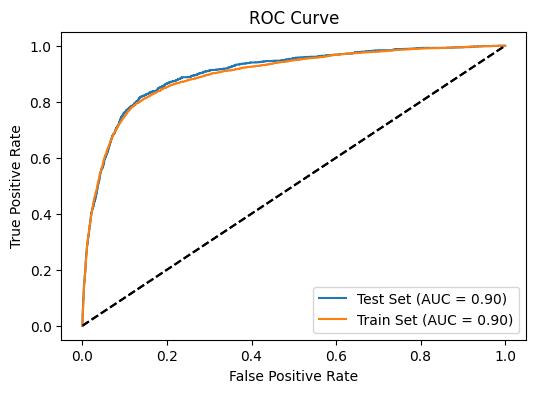

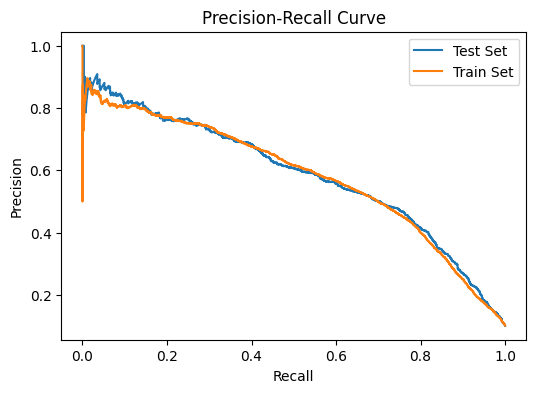

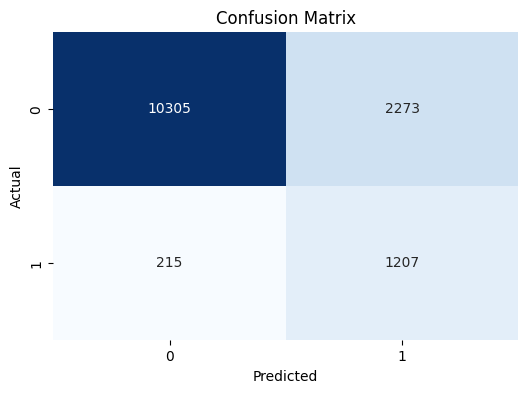

In [ ]:
lr_pipeline2.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline2, X_train, y_train, X_test, y_test)

### RFE

In [ ]:
rfe_pipeline = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced')))
          ])

rfe_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced')))])

In [ ]:
rfe_pipeline.fit(X_train, y_train)

df = pd.DataFrame({
    'Feature': rfe_pipeline.named_steps['preprocessor'].get_feature_names_out(),
    'Ranking': rfe_pipeline.named_steps['rfe'].ranking_,
    'Support': rfe_pipeline.named_steps['rfe'].support_
})

df

Feature  Ranking  Support
0         custom_fe__date_diff_rech_6        2    False
1         custom_fe__date_diff_rech_7        1     True
2         custom_fe__date_diff_rech_8        1     True
3    custom_fe__date_diff_rech_data_6       14    False
4    custom_fe__date_diff_rech_data_7       13    False
..                                ...      ...      ...
176       unchanged_cols__sachet_3g_8       19    False
177               unchanged_cols__aon        1     True
178        unchanged_cols__aug_vbc_3g       89    False
179        unchanged_cols__jul_vbc_3g       90    False
180        unchanged_cols__jun_vbc_3g       91    False

[181 rows x 3 columns]

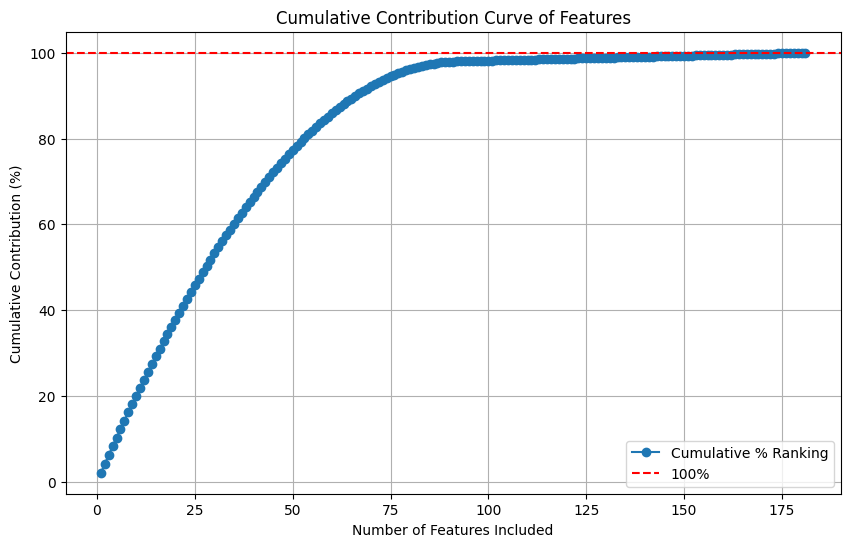

In [ ]:
# Sort the features based on their ranking
df_sorted = df.sort_values(by='Ranking', ascending=False)

# Create a cumulative sum of rankings (or use support values for another perspective)
cumulative_ranking = np.cumsum(df_sorted['Ranking'])

# Normalize to make it cumulative percentage
cumulative_percentage = cumulative_ranking / cumulative_ranking.max() * 100

# Plot the cumulative curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_percentage) + 1), cumulative_percentage, marker='o', label='Cumulative % Ranking')
plt.axhline(100, color='r', linestyle='--', label='100%')
plt.title('Cumulative Contribution Curve of Features')
plt.xlabel('Number of Features Included')
plt.ylabel('Cumulative Contribution (%)')
plt.legend()
plt.grid()
plt.show()

Selecting 65 features

### with RFE and Balanced

In [ ]:
lr_pipeline3 = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping()),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced'), n_features_to_select=75)),
              ('lreg_classifier', LogisticRegression(class_weight='balanced'))
          ])


lr_pipeline3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping()),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced'),
                     n_features_to_select=75)),
                ('lreg_classifier',
                 LogisticRegression(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.35      0.84      0.49      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.90     12578
           1       0.35      0.86      0.50      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.84      0.70     14000
weighted avg       0.92      0.83      0.86     14000

ROC AUC (Train Set): 0.902320245722282
ROC AUC (Test Set): 0.90756693702464


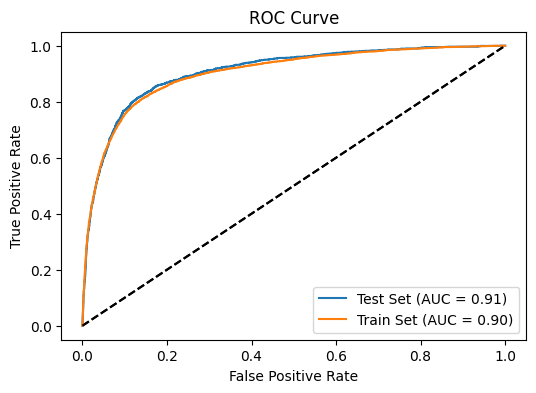

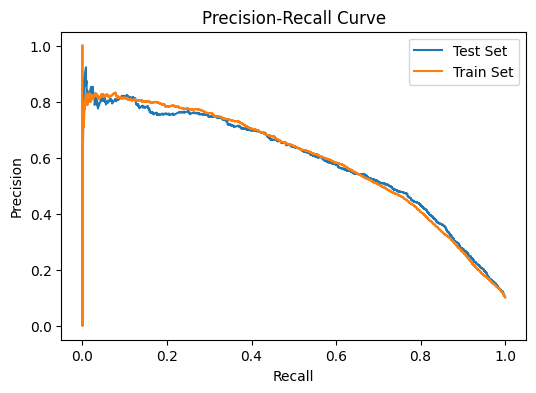

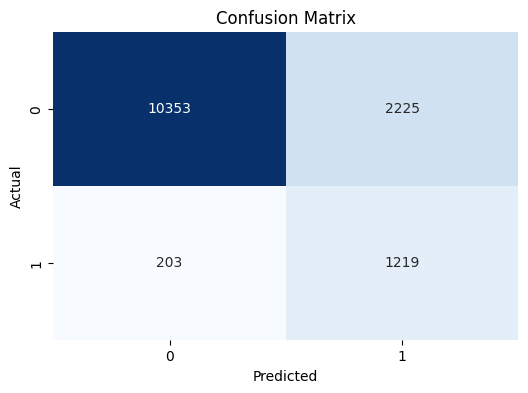

In [ ]:
lr_pipeline3.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline3, X_train, y_train, X_test, y_test)

### with SMOTE

**Handling Class Imbalance with SMOTE**

This section addresses the class imbalance issue present in the dataset by applying the **Synthetic Minority Over-sampling Technique (SMOTE)**.  Class imbalance occurs when one class (in this case, churn or no churn) has significantly fewer instances than the other, which can lead to biased model training.


**What is SMOTE?**

SMOTE is an oversampling technique that addresses class imbalance by creating synthetic samples of the minority class. It works by:

1. **Identifying nearest neighbors:** For each minority class instance, SMOTE finds its k-nearest neighbors (other instances of the same class).
2. **Creating synthetic instances:** It then creates new instances by interpolating between the minority instance and its neighbors. This involves selecting a random neighbor and creating a new instance at a random point along the line segment connecting the two instances.

**How SMOTE helps:**

By generating synthetic samples, SMOTE increases the representation of the minority class in the dataset, making it more balanced. This helps prevent the model from being biased towards the majority class and improves its ability to learn patterns from the minority class. As a result, the model's performance on the minority class, and overall, is expected to improve.

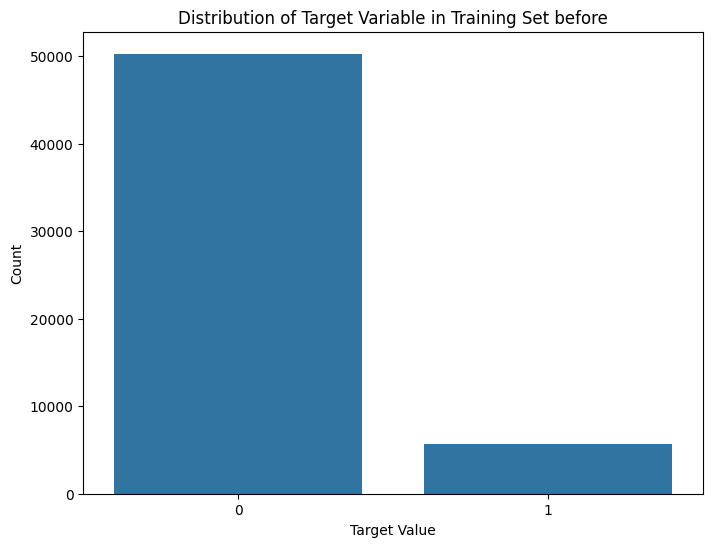

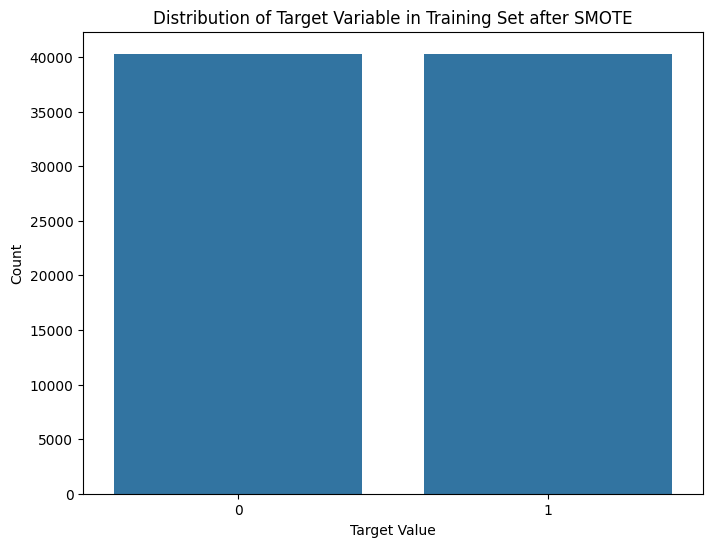

In [ ]:
# Count the occurrences of each target value
target_counts = y_train.value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target Variable in Training Set before")
plt.show()


# Perform SMOTE

# Convert preprocessor output to DataFrame with appropriate columns
transformed_X_train = pd.DataFrame(preprocessor.transform(X_train), columns=preprocessor.get_feature_names_out())

# Now, concatenate the transformed data with y_train
temp_df1 = pd.concat([transformed_X_train, y_train], join='inner', axis=1)

# Continue with the rest of your code
temp_df2 = SMOTE(random_state=42).fit_resample(temp_df1.drop(columns=['churn_probability']), temp_df1['churn_probability'])

#X_train_temp = temp_df2[0]
y_train_temp = temp_df2[1]

# Count the occurrences of each target value
target_counts = y_train_temp.value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target Variable in Training Set after SMOTE")
plt.show()

In [ ]:
lr_pipeline4 = imbPipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced'), n_features_to_select=75)),
              ('smote', SMOTE()),
              ('lreg_classifier', LogisticRegression(class_weight='balanced'))
          ])


lr_pipeline4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced'),
                     n_features_to_select=75)),
                ('smote', SMOTE()),
                ('lreg_classifier',
                 LogisticRegression(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.35      0.83      0.49      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12578
           1       0.35      0.84      0.49      1422

    accuracy                           0.82     14000
   macro avg       0.66      0.83      0.69     14000
weighted avg       0.91      0.82      0.85     14000

ROC AUC (Train Set): 0.8979043440646861
ROC AUC (Test Set): 0.9035793302395023


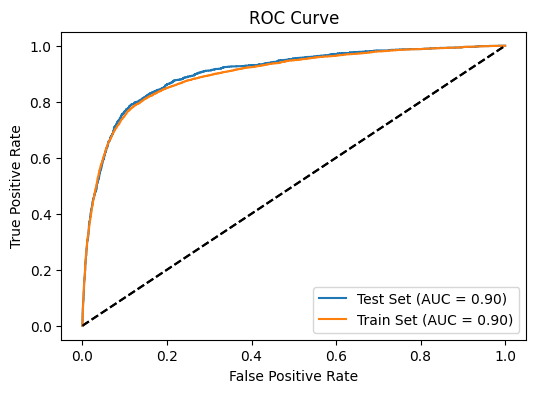

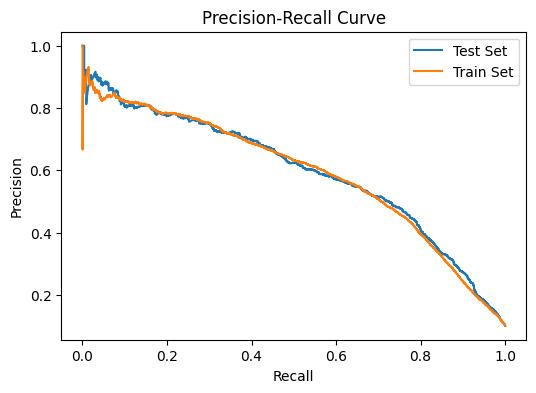

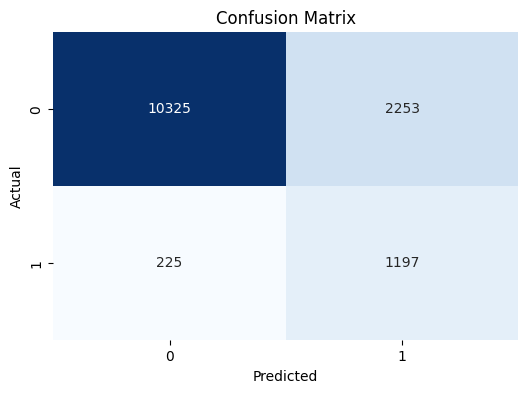

In [ ]:
lr_pipeline4.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline4, X_train, y_train, X_test, y_test)

### Grid Search

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Best score: 0.4915619924805716

---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 90) (55999,) (14000, 90) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     50289
           1       0.35      0.84      0.49      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12578
           1       0.35      0.86      0.50      1422

    accuracy                           0.83     14000
   macro avg       0.67      0.84      0.70     1

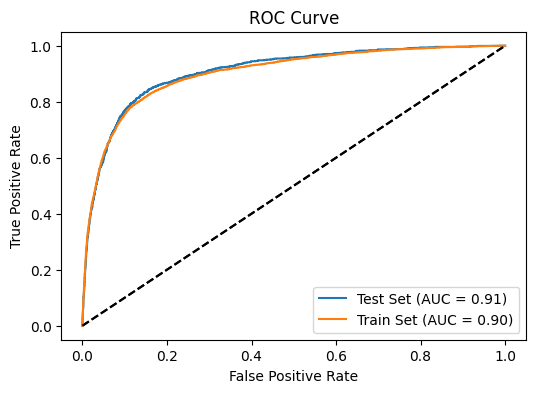

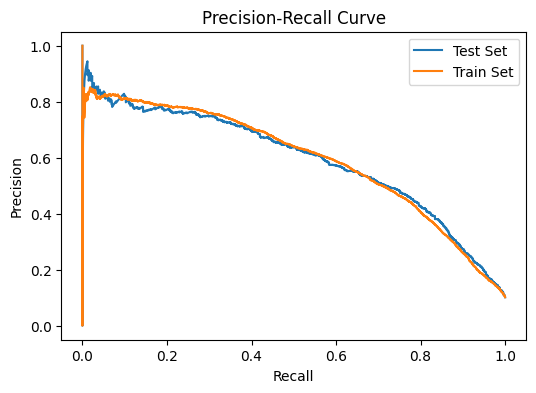

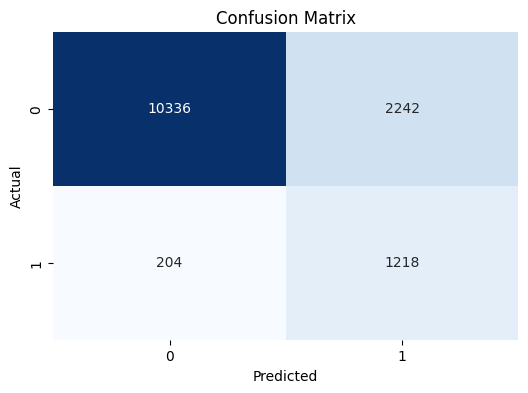

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

X_train_rfe = rfe_pipeline.transform(X_train)
X_test_rfe = rfe_pipeline.transform(X_test)

# Create GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced'),
                              param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search_lr.fit(X_train_rfe, y_train)

# Print the best hyperparameters and the best score
print("\nBest hyperparameters:", grid_search_lr.best_params_)
print("Best score:", grid_search_lr.best_score_)


# Evaluate the best model on the test set
best_lr_model = grid_search_lr.best_estimator_
classification_metrics_and_graphs(best_lr_model, X_train_rfe, y_train, X_test_rfe, y_test)

## Final Logistic RegressionPipeline for Feature Importance

In [ ]:
lr_pipeline_final = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler()),
              ('rfe', RFE(estimator=LogisticRegression(class_weight='balanced'), n_features_to_select=65)),
              ('lreg_classifier', LogisticRegression(class_weight='balanced',
                                                     C=1,
                                                     penalty='l2'))
          ])


lr_pipeline_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(class_weight='balanced'),
                     n_features_to_select=65)),
                ('lreg_classifier',
                 LogisticRegression(C=1, class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     50289
           1       0.34      0.84      0.48      5710

    accuracy                           0.82     55999
   macro avg       0.66      0.83      0.69     55999
weighted avg       0.91      0.82      0.85     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     12578
           1       0.34      0.85      0.49      1422

    accuracy                           0.82     14000
   macro avg       0.66      0.83      0.69     14000
weighted avg       0.92      0.82      0.85     14000

ROC AUC (Train Set): 0.897399684813024
ROC AUC (Test Set): 0.9032227927269703


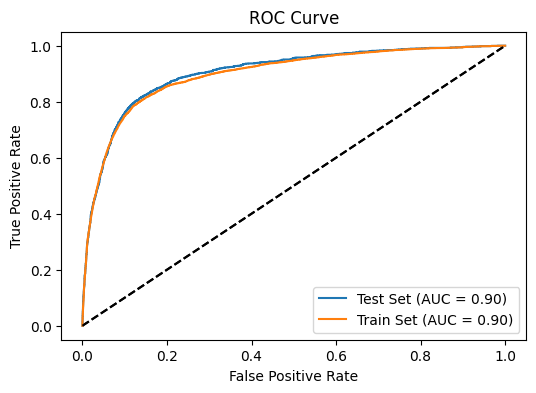

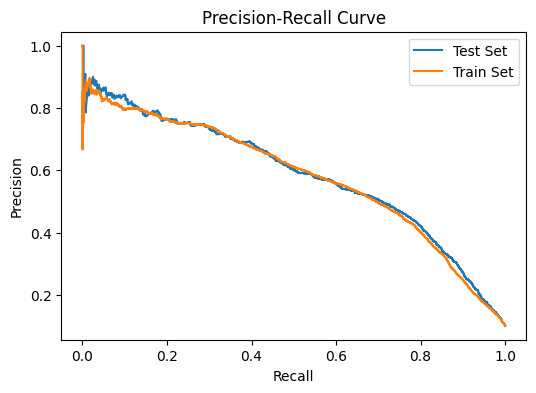

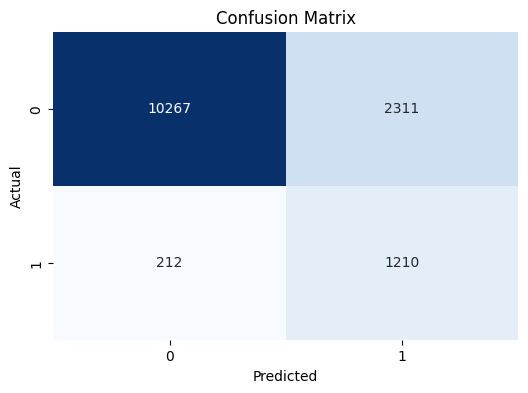

In [ ]:
lr_pipeline_final.fit(X_train, y_train)

classification_metrics_and_graphs(lr_pipeline_final, X_train, y_train, X_test, y_test)

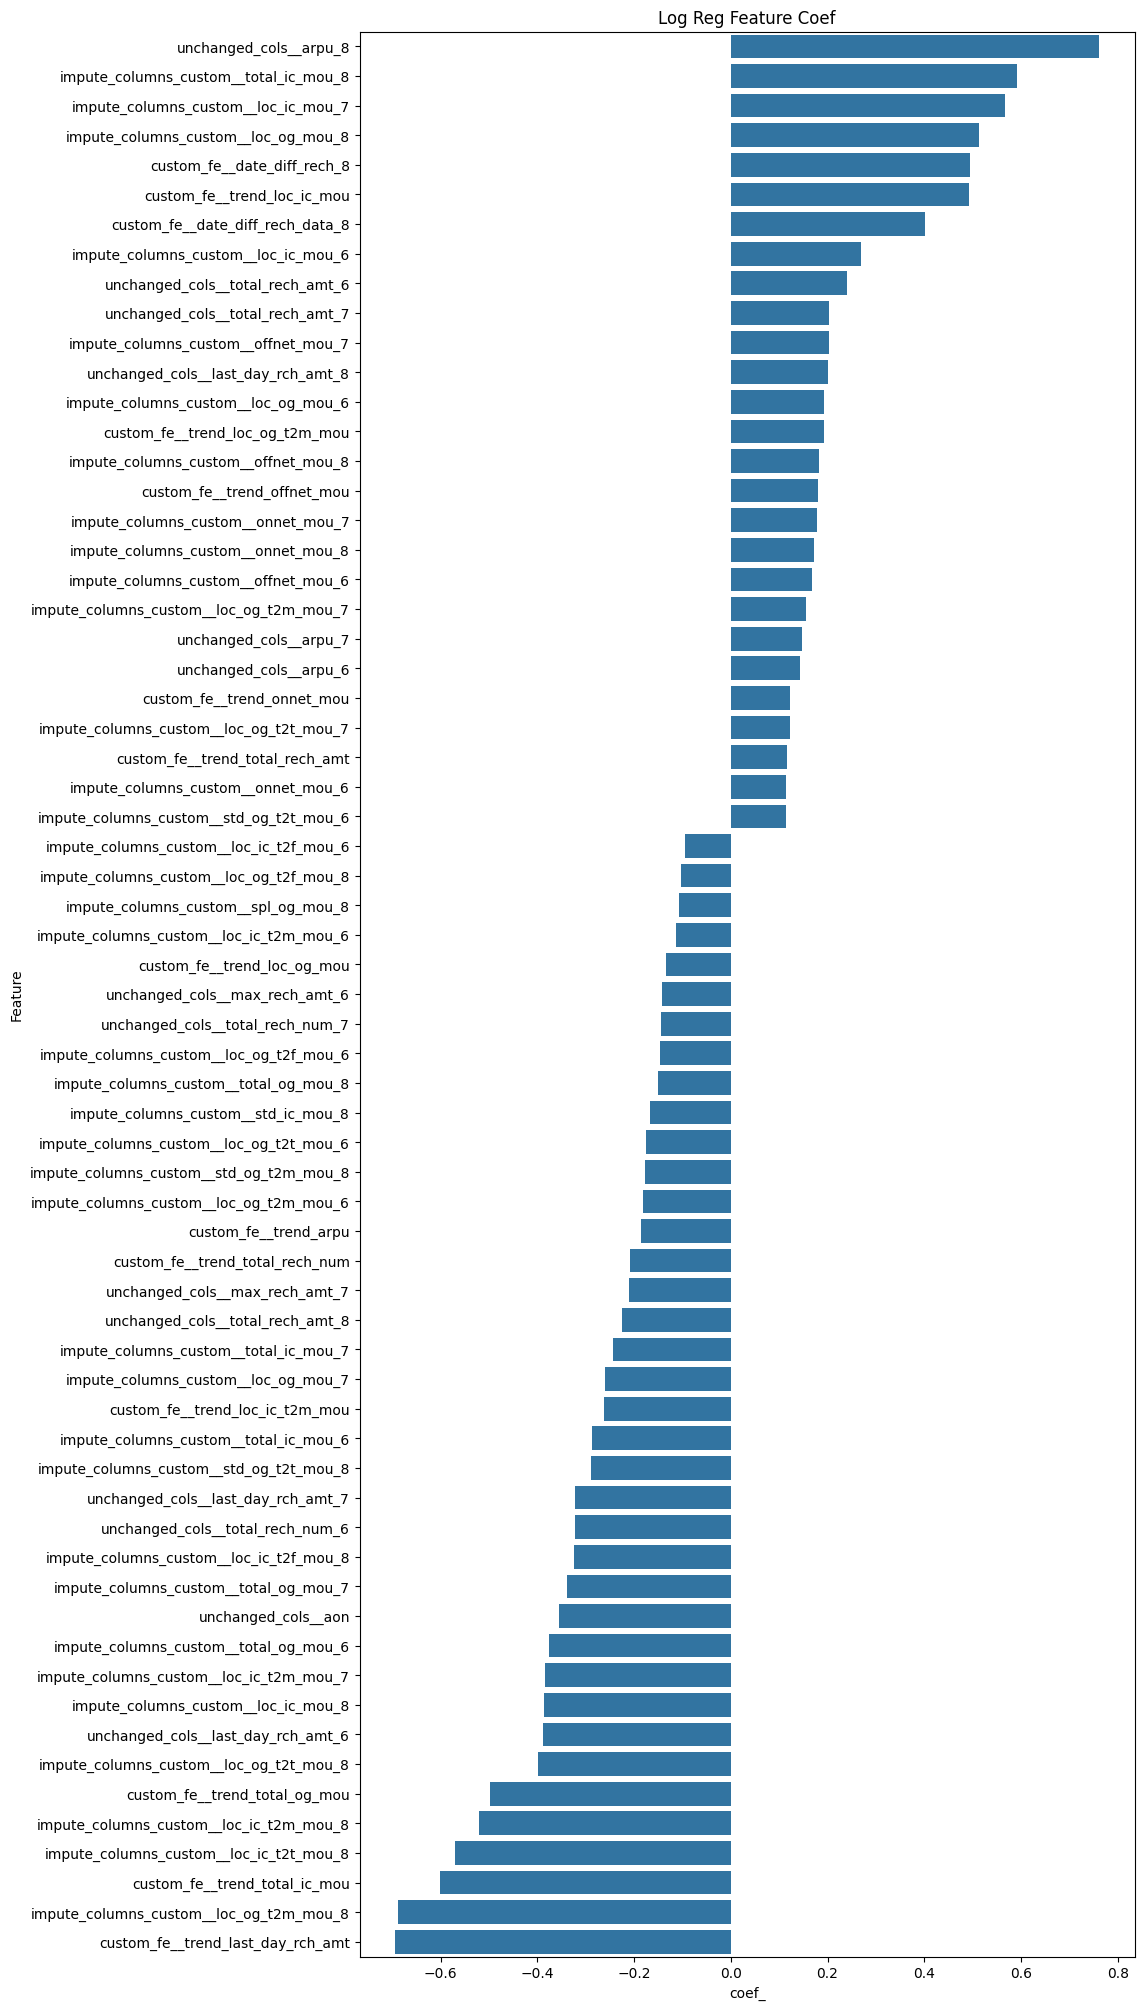

In [ ]:
lr_feature_importance = pd.DataFrame({
                        'Feature': lr_pipeline_final.named_steps['preprocessor'].get_feature_names_out()[lr_pipeline_final.named_steps['rfe'].get_support()],
                        'coef_': lr_pipeline_final.named_steps['lreg_classifier'].coef_[0]
                    })
lr_feature_importance = lr_feature_importance.sort_values(by='coef_', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 25))
sns.barplot(x='coef_', y='Feature', data=lr_feature_importance)
plt.title('Log Reg Feature Coef')
plt.xlabel('coef_')
plt.ylabel('Feature')
plt.show()

     sensitivity  specificity  accuracy
0.0        1.000        0.000     0.102
0.1        0.971        0.361     0.423
0.2        0.942        0.525     0.567
0.3        0.913        0.646     0.673
0.4        0.880        0.741     0.755
0.5        0.842        0.814     0.817
0.6        0.790        0.873     0.865
0.7        0.690        0.923     0.899
0.8        0.532        0.959     0.915
0.9        0.324        0.986     0.919
1.0        0.000        1.000     0.898


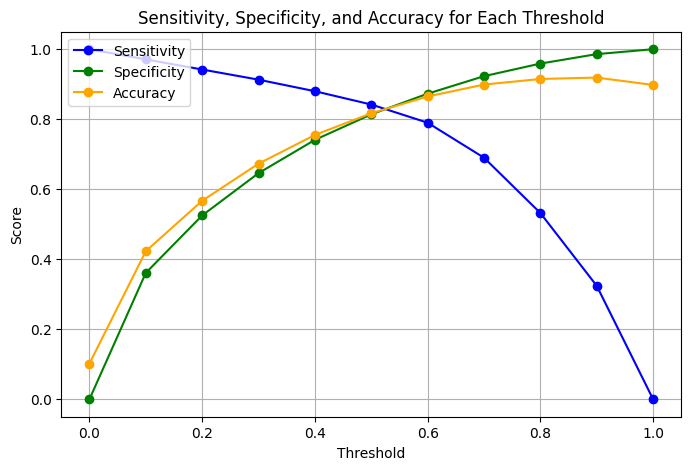

In [ ]:
model_metrics_at_thresholds(lr_pipeline_final, X_train, y_train)

## Random Forrest

In [ ]:
rf_pipeline = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler()),
              ('rf_classifier', RandomForestClassifier(class_weight='balanced'))
          ])


rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()),
                ('rf_classifier',
                 RandomForestClassifier(class_weight='balanced'))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(55999, 222) (55999,) (14000, 171) (14000,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50289
           1       1.00      1.00      1.00      5710

    accuracy                           1.00     55999
   macro avg       1.00      1.00      1.00     55999
weighted avg       1.00      1.00      1.00     55999


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12578
           1       0.78      0.58      0.67      1422

    accuracy                           0.94     14000
   macro avg       0.87      0.78      0.82     14000
weighted avg       0.94      0.94      0.94     14000

ROC AUC (Train Set): 1.0
ROC AUC (Test Set): 0.936358333562564


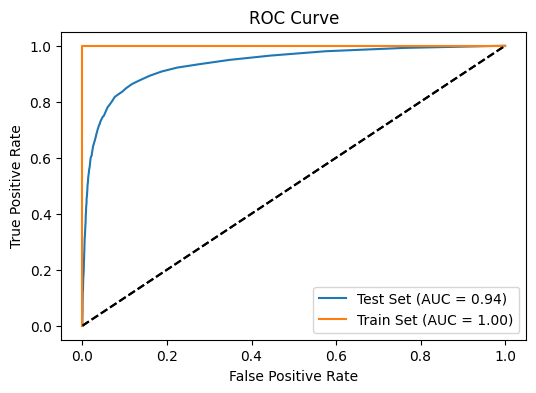

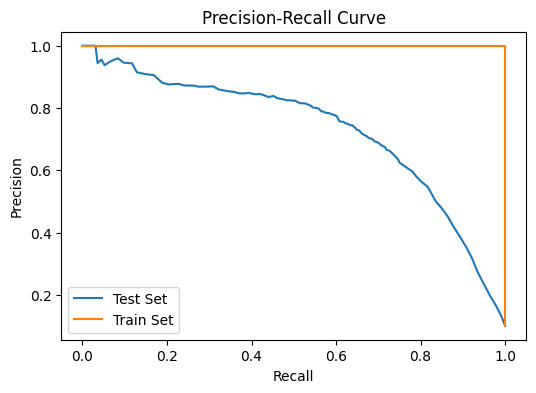

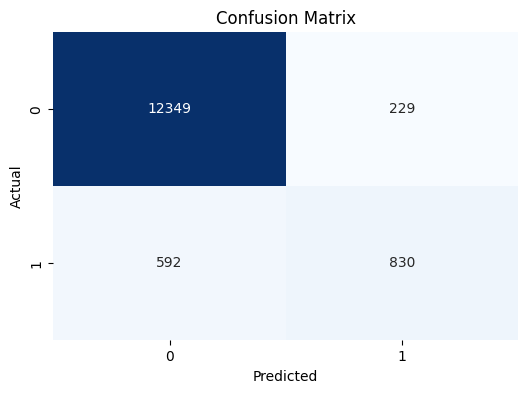

In [ ]:
rf_pipeline.fit(X_train, y_train)

classification_metrics_and_graphs(rf_pipeline, X_train, y_train, X_test, y_test)

overfitting so try to generalize

### Grid Search

In [ ]:
rf_data_pipeline = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler())
          ])

rf_data_pipeline.fit(X_train, y_train)

rf_data_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'last_day_rch_amt_6',
                                                   'last_day_rch_amt_7',
                                                   'last_day_rch_amt_8',
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler())])

roc_auc: Area Under the Receiver Operating Characteristic Curve is a good choice for imbalanced datasets, as it accounts for both sensitivity and specificity

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300,],
    'max_depth': [2, 3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
}

X_train_temp = rf_data_pipeline.transform(X_train)
X_test_temp = rf_data_pipeline.transform(X_test)

# Create GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'),
                              param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_temp, y_train)

# Print the best hyperparameters and the best score
print("\nBest hyperparameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
classification_metrics_and_graphs(best_rf_model, X_train_temp, y_train, X_test_temp, y_test)

## Final Random Forest Pipeline for Feature Importance

In [ ]:
rf_pipeline_final = Pipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler()),
              ('rf_classifier', RandomForestClassifier(class_weight='balanced', max_depth= 3, n_estimators= 300))
          ])


rf_pipeline_final

In [ ]:
rf_pipeline_final.fit(X_train, y_train)

classification_metrics_and_graphs(rf_pipeline_final, X_train, y_train, X_test, y_test)

In [ ]:
# Access the random forest model within the pipeline
rf_model = rf_pipeline_final.named_steps['rf_classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 25))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Models for Kaggle / Accuracy

## Gradient Boosting

In [ ]:
gb_data_pipeline = imbPipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler()),
              ('smote', SMOTE()),
              ('pca', PCA(n_components=0.95))
          ])

gb_data_pipeline.fit(X_train, y_train)

gb_data_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca', PCA(n_components=0.95))])

### Grid Search

In [ ]:
# Define the parameter grid for GridSearchCV
param_grid_gb_a = {
    'gradient_boosting__n_estimators': [50, 100, 200],
    'gradient_boosting__learning_rate': [0.01, 0.1, 1],
    'gradient_boosting__max_depth': [2, 3, 4],
}

X_train_temp = gb_data_pipeline.transform(X_train)
X_test_temp = gb_data_pipeline.transform(X_test)

# Create GridSearchCV object
grid_search_gb_a = GridSearchCV(GradientBoostingClassifier(),
                                       param_grid_gb_a, cv=2, scoring='accuracy', n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search_gb_a.fit(X_train_temp, y_train)

# Print the best hyperparameters and the best score
print("\nBest hyperparameters:", grid_search_gb_a.best_params_)
print("Best score:", grid_search_gb_a.best_score_)

# Evaluate the best model on the test set
best_gb_a_model = grid_search_gb_a.best_estimator_
classification_metrics_and_graphs(best_gb_a_model, X_train_temp, y_train, X_test_temp, y_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


## XGB

In [ ]:
xgb_data_pipeline = imbPipeline([
              ('preprocessor', preprocessor),
              ('outlier_capping', CustomOutlierCapping(method='iqr', factor=3)),
              ('scaler', StandardScaler()),
              ('smote', SMOTE()),
              ('pca', PCA(n_components=0.95)),
          ])

xgb_data_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca', PCA(n_components=0.95))])

In [ ]:
xgb_data_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca', PCA(n_components=0.95))])

In [ ]:
xgb_data_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('custom_fe',
                                                  Pipeline(steps=[('fe',
                                                                   CustomFeatureEngineering()),
                                                                  ('fe_simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant'))]),
                                                  ['last_date_of_month_6',
                                                   'last_date_of_month_7',
                                                   'last_date_of_month_8',
                                                   'date_of_last_rech_6',
                                                   'date_of_last_rech_7',
                                                   'date_of_last_rech_8',
                                                   'date_of_last_r...
                                                   'vol_2g_mb_6', 'vol_2g_mb_7',
                                                   'vol_2g_mb_8', 'vol_3g_mb_6',
                                                   'vol_3g_mb_7', 'vol_3g_mb_8',
                                                   'monthly_2g_6',
                                                   'monthly_2g_7',
                                                   'monthly_2g_8',
                                                   'sachet_2g_6', 'sachet_2g_7',
                                                   'sachet_2g_8',
                                                   'monthly_3g_6',
                                                   'monthly_3g_7',
                                                   'monthly_3g_8', ...])])),
                ('outlier_capping', CustomOutlierCapping(factor=3)),
                ('scaler', StandardScaler()), ('smote', SMOTE()),
                ('pca', PCA(n_components=0.95))])


---------------------------------
Classification Metrics and Graphs
---------------------------------

Data Shape:
X_train, y_train, X_test, y_test
(16786, 56) (16786,) (4197, 56) (4197,)

Classification Report (Train Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15739
           1       1.00      1.00      1.00      1047

    accuracy                           1.00     16786
   macro avg       1.00      1.00      1.00     16786
weighted avg       1.00      1.00      1.00     16786


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3926
           1       0.65      0.29      0.40       271

    accuracy                           0.94      4197
   macro avg       0.80      0.64      0.68      4197
weighted avg       0.93      0.94      0.93      4197

ROC AUC (Train Set): 1.0
ROC AUC (Test Set): 0.8668503852639139


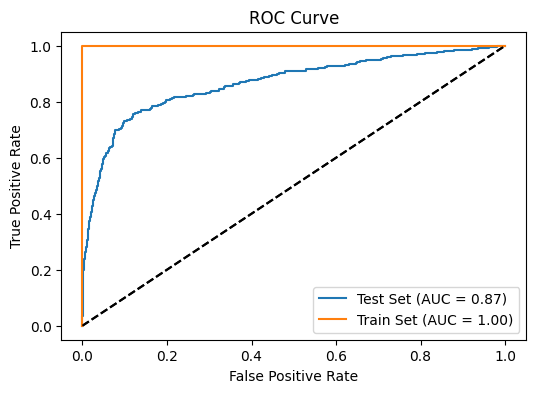

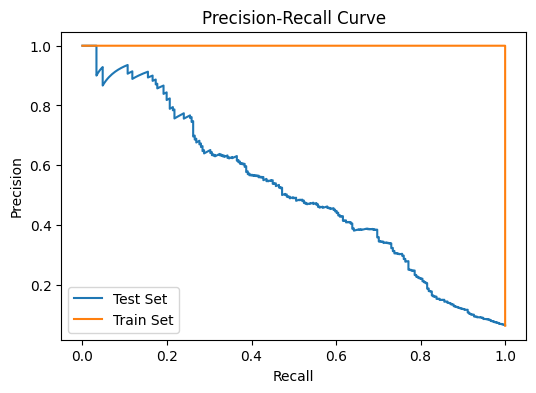

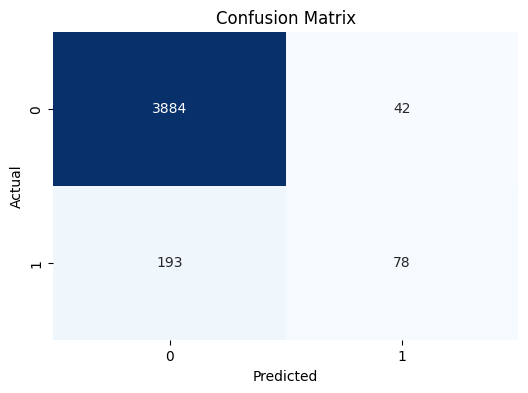

In [ ]:
import xgboost as xgb

# Create XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                             use_label_encoder=False,
                             eval_metric='error',    # error is 1 - accuracy
                              tree_method='gpu_hist',  # Use GPU-accelerated histogram method
                              )

X_train_transformed = xgb_data_pipeline.transform(X_train) # Use only transform after fitting the pipeline
X_test_transformed = xgb_data_pipeline.transform(X_test) # Transforming the test data using the fitted pipeline

# Train the XGBoost model using transformed data
xgb_model.fit(X_train_transformed, y_train)


# Make predictions using transformed data
y_pred = xgb_model.predict(X_test_transformed)

# Evaluate the model using transformed data
classification_metrics_and_graphs(xgb_model, X_train_transformed, y_train, X_test_transformed, y_test)

### Grid Search

In [ ]:
# prompt: xgb grid search without using sklearn gridsearchCV, code on own

import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming 'preprocessor', 'X_train', 'y_train', 'X_test', 'y_test', and other necessary variables are defined from the preceding code.
# Example parameter grid (replace with your desired grid)
'''
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, 5, 10],  # Based on class imbalance
    'min_child_weight': [1, 2, 5],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss', 'auc']
}
'''

param_grid_xgb = {
    'n_estimators': [500, 1000, 5000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6]
}

X_train_transformed = xgb_data_pipeline.transform(X_train) # Use only transform after fitting the pipeline
X_test_transformed = xgb_data_pipeline.transform(X_test) # Transforming the test data using the fitted pipeline


# Iterate over the parameter grid
best_score = -1
best_params = {}
for n_estimators in param_grid_xgb['n_estimators']:
    for learning_rate in param_grid_xgb['learning_rate']:
        for max_depth in param_grid_xgb['max_depth']:
          #for subsample in param_grid_xgb['subsample']:
          #  for colsample_bytree in param_grid_xgb['colsample_bytree']:
          #    for scale_pos_weight in param_grid_xgb['scale_pos_weight']:
          #      for min_child_weight in param_grid_xgb['min_child_weight']:
          #        for objective in param_grid_xgb['objective']:
          #          for eval_metric in param_grid_xgb['eval_metric']:

                          # Create and train the XGBoost model with current hyperparameters
                          xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                                                      use_label_encoder=False,
                                                      eval_metric='error',
                                                      n_estimators=n_estimators,
                                                      learning_rate=learning_rate,
                                                      max_depth=max_depth,
                                                      tree_method='gpu_hist')

                          xgb_model.fit(X_train_transformed, y_train)

                          # Evaluate the model (replace with your preferred metric)
                          y_pred = xgb_model.predict(X_test_transformed)
                          score = (y_pred == y_test).mean()
                          print(f"score: {score}")
                          if score > best_score:
                              best_score = score
                              best_params = {'n_estimators': n_estimators,
                                            'learning_rate': learning_rate,
                                            'max_depth': max_depth}

print(f"\nBest hyperparameters: {best_params}")
print(f"Best accuracy: {best_score}")

# Train the model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                                   use_label_encoder=False,
                                   eval_metric='error',
                                   **best_params,
                                   tree_method='gpu_hist')

#best_xgb_model.fit(transformed_data, y_train)
#classification_metrics_and_graphs(best_xgb_model, X_train_transformed, y_train, X_test_transformed, y_test)

score: 0.9253571428571429
score: 0.929
score: 0.9303571428571429
score: 0.9313571428571429
score: 0.9308571428571428
score: 0.9322142857142857
score: 0.9309285714285714
score: 0.9316428571428571
score: 0.9292142857142857
score: 0.9319285714285714
score: 0.9295714285714286
score: 0.9309285714285714
score: 0.9297857142857143
score: 0.9308571428571428
score: 0.9322142857142857
score: 0.9318571428571428
score: 0.9322142857142857
score: 0.9314285714285714
score: 0.9318571428571428
score: 0.932
score: 0.9307142857142857
score: 0.931
score: 0.9308571428571428
score: 0.9312142857142857
score: 0.9309285714285714
score: 0.9318571428571428
score: 0.9312142857142857
score: 0.9322857142857143
score: 0.9318571428571428
score: 0.9319285714285714
score: 0.9325
score: 0.9327857142857143
score: 0.9295
score: 0.9316428571428571
score: 0.9314285714285714
score: 0.9314285714285714

Best hyperparameters: {'n_estimators': 5000, 'learning_rate': 0.1, 'max_depth': 6}
Best accuracy: 0.9327857142857143

--------

ValueError: Feature shape mismatch, expected: 181, got 45

# Creating submittion file

In [ ]:
unseen.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [ ]:
unseen['churn_probability'] = xgb_model.predict(xgb_data_pipeline.transform(unseen))
output = unseen[['id','churn_probability']]
output

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  1
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  1
29999  99998                  0

[30000 rows x 2 columns]

In [ ]:
output.to_csv('kaggle_submission.csv',index=False)